<h1>Experiment with beer3pos</h1>

In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import os
import sys
basedir = '/home/joewandy/git/metabolomics_tools'
sys.path.append(basedir)

In [13]:
import numpy as np
import pylab as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
from IPython.display import display, HTML

import cPickle
import random
import copy
import glob
import gzip

In [14]:
from alignment.models import HyperPars as AlignmentHyperPars
from alignment.experiment import *

<h2>Experiment Parameters</h2>

Set up all the experiment parameters

In [15]:
input_dir = '/home/joewandy/git/metabolomics_tools/alignment/input/beer3pos'
transformation_file = '/home/joewandy/git/metabolomics_tools/alignment/pos_transformations_full.yml'
gt_file = '/home/joewandy/git/metabolomics_tools/alignment/input/beer3pos/ground_truth/beer3.positive.dat'

In [16]:
hp = AlignmentHyperPars()    
hp.within_file_mass_tol = 3
hp.within_file_rt_tol = 10
hp.across_file_mass_tol = 10
hp.across_file_rt_tol = 60
hp.alpha_mass = 1
hp.dp_alpha = 1000.0
hp.beta = 0.1
hp.t = 0.0
hp.mass_clustering_n_iterations = 10000
hp.rt_clustering_nsamps = 1000
hp.rt_clustering_burnin = 0

print hp

Hyperparameters across_file_mass_tol=10, across_file_rt_tol=60, alpha_mass=1, beta=0.1, dp_alpha=1000.0, mass_clustering_n_iterations=10000, matching_alpha=0.3, rt_clustering_burnin=0, rt_clustering_nsamps=1000, second_stage_clustering_use_adduct_likelihood=True, second_stage_clustering_use_mass_likelihood=True, second_stage_clustering_use_rt_likelihood=True, t=0.0, within_file_mass_tol=3, within_file_rt_tol=10


In [17]:
evaluation_method = 2
n_iter = 1

In [18]:
param_list = []
for mass_tol in range(2, 7, 2):
    for rt_tol in range(5, 31, 5):
        param_list.append((mass_tol, rt_tol))

In [19]:
param_list_mwg = []
for mass_tol in range(2, 7, 2):
    for rt_tol in range(5, 31, 5):
        for group_tol in range(2, 11, 2):
            for alpha in range(0, 11, 2):
                param_list_mwg.append((mass_tol, rt_tol, group_tol, alpha/10.0))

<h2>Create the first-stage clustering for all input files -- Gibbs, mh_biggest=True</h2>

In [20]:
combined_list = load_or_create_clustering('pickles/beer3pos_new/clustering.p', input_dir, transformation_file, hp)

7553 features read from beer3-file1.csv
7579 features read from beer3-file2.csv
7240 features read from beer3-file3.csv
Created 7553 clusters
Binning with mh_biggest = True
Assigning possible transformations 0/7553
Assigning possible transformations 500/7553
Assigning possible transformations 1000/7553
Assigning possible transformations 1500/7553
Assigning possible transformations 2000/7553
Assigning possible transformations 2500/7553
Assigning possible transformations 3000/7553
Assigning possible transformations 3500/7553
Assigning possible transformations 4000/7553
Assigning possible transformations 4500/7553
Assigning possible transformations 5000/7553
Assigning possible transformations 5500/7553
Assigning possible transformations 6000/7553
Assigning possible transformations 6500/7553
Assigning possible transformations 7000/7553
Assigning possible transformations 7500/7553
1246 peaks to be re-sampled in stage 1
Created 7579 clusters
Binning with mh_biggest = True
Assigning possible 

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed: 10.6min
[Parallel(n_jobs=1)]: Done   2 jobs       | elapsed: 21.4min


1279 peaks to be re-sampled in stage 1
Created 7240 clusters
Binning with mh_biggest = True
Assigning possible transformations 0/7240
Assigning possible transformations 500/7240
Assigning possible transformations 1000/7240
Assigning possible transformations 1500/7240
Assigning possible transformations 2000/7240
Assigning possible transformations 2500/7240
Assigning possible transformations 3000/7240
Assigning possible transformations 3500/7240
Assigning possible transformations 4000/7240
Assigning possible transformations 4500/7240
Assigning possible transformations 5000/7240
Assigning possible transformations 5500/7240
Assigning possible transformations 6000/7240
Assigning possible transformations 6500/7240
Assigning possible transformations 7000/7240
1212 peaks to be re-sampled in stage 1
Saved to pickles/beer3pos_new/clustering.p


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 31.5min finished


<h2>Run experiment with beer3pos</h2>

In [21]:
n_files = 3

In [22]:
training_list = load_or_create_filelist('pickles/beer3pos_new/training_list.p', combined_list, n_iter, n_files)

['beer3-file1.csv', 'beer3-file2.csv', 'beer3-file3.csv']
Saved to pickles/beer3pos_new/training_list.p


In [23]:
testing_list = load_or_create_filelist('pickles/beer3pos_new/testing_list.p', combined_list, n_iter, n_files)

['beer3-file3.csv', 'beer3-file2.csv', 'beer3-file1.csv']
Saved to pickles/beer3pos_new/testing_list.p


In [24]:
exp_results_1a = run_experiment(0, training_list, testing_list, param_list, 'pickles/beer3pos_new/res_match_feature.p', hp, evaluation_method, transformation_file, gt_file)

Iteration 0
Training on ['beer3-file1.csv', 'beer3-file2.csv', 'beer3-file3.csv']
mass_tol=2, rt_tol=5, tp=231, fp=24, fn=45, prec=0.906, rec=0.837, f1=0.870, th_prob=1.000
mass_tol=2, rt_tol=10, tp=247, fp=29, fn=29, prec=0.895, rec=0.895, f1=0.895, th_prob=1.000
mass_tol=2, rt_tol=15, tp=251, fp=29, fn=25, prec=0.896, rec=0.909, f1=0.903, th_prob=1.000
mass_tol=2, rt_tol=20, tp=251, fp=33, fn=25, prec=0.884, rec=0.909, f1=0.896, th_prob=1.000
mass_tol=2, rt_tol=25, tp=251, fp=33, fn=25, prec=0.884, rec=0.909, f1=0.896, th_prob=1.000
mass_tol=2, rt_tol=30, tp=251, fp=33, fn=25, prec=0.884, rec=0.909, f1=0.896, th_prob=1.000
mass_tol=4, rt_tol=5, tp=231, fp=24, fn=45, prec=0.906, rec=0.837, f1=0.870, th_prob=1.000
mass_tol=4, rt_tol=10, tp=247, fp=29, fn=29, prec=0.895, rec=0.895, f1=0.895, th_prob=1.000
mass_tol=4, rt_tol=15, tp=251, fp=29, fn=25, prec=0.896, rec=0.909, f1=0.903, th_prob=1.000
mass_tol=4, rt_tol=20, tp=251, fp=33, fn=25, prec=0.884, rec=0.909, f1=0.896, th_prob=1.000


In [25]:
exp_results_1b = run_experiment(1, training_list, testing_list, param_list, 'pickles/beer3pos_new/res_match_cluster.p', hp, evaluation_method, transformation_file, gt_file)

Iteration 0
Training on ['beer3-file1.csv', 'beer3-file2.csv', 'beer3-file3.csv']
mass_tol=2, rt_tol=5, tp=222, fp=21, fn=54, prec=0.914, rec=0.804, f1=0.855, th_prob=1.000
mass_tol=2, rt_tol=10, tp=241, fp=22, fn=35, prec=0.916, rec=0.873, f1=0.894, th_prob=1.000
mass_tol=2, rt_tol=15, tp=247, fp=22, fn=29, prec=0.918, rec=0.895, f1=0.906, th_prob=1.000
mass_tol=2, rt_tol=20, tp=247, fp=25, fn=29, prec=0.908, rec=0.895, f1=0.901, th_prob=1.000
mass_tol=2, rt_tol=25, tp=247, fp=25, fn=29, prec=0.908, rec=0.895, f1=0.901, th_prob=1.000
mass_tol=2, rt_tol=30, tp=247, fp=25, fn=29, prec=0.908, rec=0.895, f1=0.901, th_prob=1.000
mass_tol=4, rt_tol=5, tp=222, fp=21, fn=54, prec=0.914, rec=0.804, f1=0.855, th_prob=1.000
mass_tol=4, rt_tol=10, tp=241, fp=22, fn=35, prec=0.916, rec=0.873, f1=0.894, th_prob=1.000
mass_tol=4, rt_tol=15, tp=247, fp=22, fn=29, prec=0.918, rec=0.895, f1=0.906, th_prob=1.000
mass_tol=4, rt_tol=20, tp=247, fp=25, fn=29, prec=0.908, rec=0.895, f1=0.901, th_prob=1.000


In [26]:
exp_results_1c = run_experiment(3, training_list, testing_list, param_list_mwg, 'pickles/beer3pos_new/res_mwg.p', hp, evaluation_method, transformation_file, gt_file)

Iteration 0
Training on ['beer3-file1.csv', 'beer3-file2.csv', 'beer3-file3.csv']
mass_tol=2, rt_tol=5, grouping_tol=2, matching_alpha=0.0, tp=202, fp=22, fn=74, prec=0.902, rec=0.732, f1=0.808, th_prob=1.000
mass_tol=2, rt_tol=5, grouping_tol=2, matching_alpha=0.2, tp=233, fp=24, fn=43, prec=0.907, rec=0.844, f1=0.874, th_prob=1.000
mass_tol=2, rt_tol=5, grouping_tol=2, matching_alpha=0.4, tp=233, fp=23, fn=43, prec=0.910, rec=0.844, f1=0.876, th_prob=1.000
mass_tol=2, rt_tol=5, grouping_tol=2, matching_alpha=0.6, tp=233, fp=23, fn=43, prec=0.910, rec=0.844, f1=0.876, th_prob=1.000
mass_tol=2, rt_tol=5, grouping_tol=2, matching_alpha=0.8, tp=231, fp=24, fn=45, prec=0.906, rec=0.837, f1=0.870, th_prob=1.000
mass_tol=2, rt_tol=5, grouping_tol=2, matching_alpha=1.0, tp=231, fp=24, fn=45, prec=0.906, rec=0.837, f1=0.870, th_prob=1.000
mass_tol=2, rt_tol=5, grouping_tol=4, matching_alpha=0.0, tp=221, fp=23, fn=55, prec=0.906, rec=0.801, f1=0.850, th_prob=1.000
mass_tol=2, rt_tol=5, groupin

In [30]:
cluster_cluster = second_stage_clustering(hp, training_list, 0, evaluation_method, transformation_file, gt_file, use_adduct_likelihood=True)

Hyperparameters across_file_mass_tol=2.0, across_file_rt_tol=15.0, alpha_mass=1, beta=0.1, dp_alpha=1000.0, mass_clustering_n_iterations=10000, matching_alpha=0.0, rt_clustering_burnin=0, rt_clustering_nsamps=1000, second_stage_clustering_use_adduct_likelihood=True, second_stage_clustering_use_mass_likelihood=True, second_stage_clustering_use_rt_likelihood=True, t=0.0, within_file_mass_tol=10.0, within_file_rt_tol=10
Iteration 0
Training on ['beer3-file1.csv', 'beer3-file2.csv', 'beer3-file3.csv']
n 0	cluster_list=1	last_K = 1
n 1	cluster_list=1	last_K = 1
n 2	cluster_list=8	last_K = 5
n 3	cluster_list=1	last_K = 1
n 4	cluster_list=1	last_K = 1


[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   5 jobs       | elapsed:    1.8s


n 5	cluster_list=1	last_K = 1
n 6	cluster_list=2	last_K = 1
n 7	cluster_list=9	last_K = 5
n 8	cluster_list=2	last_K = 1
n 9	cluster_list=3	last_K = 1
n 10	cluster_list=3	last_K = 1
n 11	cluster_list=3	last_K = 1
n 12	cluster_list=10	last_K = 6


[Parallel(n_jobs=1)]: Done   8 jobs       | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done  13 jobs       | elapsed:    8.1s


n 13	cluster_list=1	last_K = 1
n 14	cluster_list=3	last_K = 2
n 15	cluster_list=8	last_K = 4
n 16	cluster_list=1	last_K = 1
n 17	cluster_list=3	last_K = 2
n 18	cluster_list=1	last_K = 1
n 19	cluster_list=2	last_K = 2
n 20	cluster_list=7	last_K = 4
n 21	cluster_list=1	last_K = 1
n 22	cluster_list=2	last_K = 2
n 23	cluster_list=3	last_K = 1
n 24	cluster_list=1	last_K = 1


[Parallel(n_jobs=1)]: Done  18 jobs       | elapsed:   10.6s
[Parallel(n_jobs=1)]: Done  25 jobs       | elapsed:   13.3s


n 25	cluster_list=1	last_K = 1
n 26	cluster_list=13	last_K = 7
n 27	cluster_list=6	last_K = 4
n 28	cluster_list=1	last_K = 1
n 29	cluster_list=6	last_K = 5
n 30	cluster_list=9	last_K = 9
n 31	cluster_list=15	last_K = 6
n 32	cluster_list=18	last_K = 12
n 33	cluster_list=6	last_K = 6
n 34	cluster_list=9	last_K = 4
n 35	cluster_list=1	last_K = 1
n 36	cluster_list=5	last_K = 3
n 37	cluster_list=2	last_K = 2
n 38	cluster_list=2	last_K = 1
n 39	cluster_list=1	last_K = 1
n 40	cluster_list=5	last_K = 5


[Parallel(n_jobs=1)]: Done  32 jobs       | elapsed:   25.2s
[Parallel(n_jobs=1)]: Done  41 jobs       | elapsed:   37.7s


n 41	cluster_list=12	last_K = 6
n 42	cluster_list=3	last_K = 1
n 43	cluster_list=4	last_K = 2
n 44	cluster_list=1	last_K = 1
n 45	cluster_list=5	last_K = 3
n 46	cluster_list=1	last_K = 1
n 47	cluster_list=5	last_K = 3
n 48	cluster_list=1	last_K = 1
n 49	cluster_list=13	last_K = 6
n 50	cluster_list=1	last_K = 1
n 51	cluster_list=1	last_K = 1
n 52	cluster_list=1	last_K = 1
n 53	cluster_list=1	last_K = 1
n 54	cluster_list=6	last_K = 3
n 55	cluster_list=3	last_K = 2
n 56	cluster_list=1	last_K = 1
n 57	cluster_list=8	last_K = 6
n 58	cluster_list=2	last_K = 1
n 59	cluster_list=7	last_K = 3
n 60	cluster_list=9	last_K = 3


[Parallel(n_jobs=1)]: Done  50 jobs       | elapsed:   46.8s
[Parallel(n_jobs=1)]: Done  61 jobs       | elapsed:   53.7s


n 61	cluster_list=3	last_K = 1
n 62	cluster_list=8	last_K = 3
n 63	cluster_list=2	last_K = 1
n 64	cluster_list=1	last_K = 1
n 65	cluster_list=3	last_K = 1
n 66	cluster_list=6	last_K = 6
n 67	cluster_list=1	last_K = 1
n 68	cluster_list=5	last_K = 4
n 69	cluster_list=2	last_K = 2
n 70	cluster_list=1	last_K = 1
n 71	cluster_list=1	last_K = 1
n 72	cluster_list=3	last_K = 1
n 73	cluster_list=1	last_K = 1
n 74	cluster_list=26	last_K = 13
n 75	cluster_list=2	last_K = 2
n 76	cluster_list=3	last_K = 1
n 77	cluster_list=1	last_K = 1
n 78	cluster_list=18	last_K = 14
n 79	cluster_list=1	last_K = 1
n 80	cluster_list=6	last_K = 3
n 81	cluster_list=2	last_K = 1
n 82	cluster_list=7	last_K = 3
n 83	cluster_list=1	last_K = 1
n 84	cluster_list=1	last_K = 1


[Parallel(n_jobs=1)]: Done  72 jobs       | elapsed:   59.2s
[Parallel(n_jobs=1)]: Done  85 jobs       | elapsed:  1.3min


n 85	cluster_list=2	last_K = 1
n 86	cluster_list=2	last_K = 2
n 87	cluster_list=3	last_K = 1
n 88	cluster_list=3	last_K = 1
n 89	cluster_list=1	last_K = 1
n 90	cluster_list=4	last_K = 2
n 91	cluster_list=3	last_K = 1
n 92	cluster_list=2	last_K = 1
n 93	cluster_list=1	last_K = 1
n 94	cluster_list=3	last_K = 1
n 95	cluster_list=1	last_K = 1
n 96	cluster_list=20	last_K = 9
n 97	cluster_list=1	last_K = 1
n 98	cluster_list=9	last_K = 5
n 99	cluster_list=4	last_K = 2
n 100	cluster_list=2	last_K = 2
n 101	cluster_list=1	last_K = 1
n 102	cluster_list=2	last_K = 2
n 103	cluster_list=8	last_K = 5
n 104	cluster_list=16	last_K = 7
n 105	cluster_list=1	last_K = 1
n 106	cluster_list=7	last_K = 7
n 107	cluster_list=3	last_K = 2
n 108	cluster_list=12	last_K = 7
n 109	cluster_list=3	last_K = 2
n 110	cluster_list=1	last_K = 1
n 111	cluster_list=4	last_K = 4
n 112	cluster_list=1	last_K = 1


[Parallel(n_jobs=1)]: Done  98 jobs       | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done 113 jobs       | elapsed:  1.7min


n 113	cluster_list=2	last_K = 2
n 114	cluster_list=4	last_K = 2
n 115	cluster_list=1	last_K = 1
n 116	cluster_list=14	last_K = 7
n 117	cluster_list=2	last_K = 1
n 118	cluster_list=17	last_K = 7
n 119	cluster_list=10	last_K = 9
n 120	cluster_list=1	last_K = 1
n 121	cluster_list=6	last_K = 4
n 122	cluster_list=3	last_K = 1
n 123	cluster_list=20	last_K = 8
n 124	cluster_list=10	last_K = 5
n 125	cluster_list=4	last_K = 2
n 126	cluster_list=1	last_K = 1
n 127	cluster_list=2	last_K = 1
n 128	cluster_list=7	last_K = 6
n 129	cluster_list=1	last_K = 1
n 130	cluster_list=4	last_K = 2
n 131	cluster_list=4	last_K = 3
n 132	cluster_list=29	last_K = 13
n 133	cluster_list=3	last_K = 1
n 134	cluster_list=2	last_K = 2
n 135	cluster_list=7	last_K = 4
n 136	cluster_list=1	last_K = 1
n 137	cluster_list=4	last_K = 3
n 138	cluster_list=2	last_K = 1
n 139	cluster_list=2	last_K = 2
n 140	cluster_list=3	last_K = 3
n 141	cluster_list=1	last_K = 1
n 142	cluster_list=16	last_K = 12
n 143	cluster_list=25	last_K = 

[Parallel(n_jobs=1)]: Done 128 jobs       | elapsed:  2.1min
[Parallel(n_jobs=1)]: Done 145 jobs       | elapsed:  2.6min


n 145	cluster_list=8	last_K = 8
n 146	cluster_list=5	last_K = 3
n 147	cluster_list=2	last_K = 2
n 148	cluster_list=1	last_K = 1
n 149	cluster_list=7	last_K = 5
n 150	cluster_list=2	last_K = 1
n 151	cluster_list=3	last_K = 1
n 152	cluster_list=5	last_K = 5
n 153	cluster_list=20	last_K = 14
n 154	cluster_list=1	last_K = 1
n 155	cluster_list=1	last_K = 1
n 156	cluster_list=1	last_K = 1
n 157	cluster_list=14	last_K = 5
n 158	cluster_list=2	last_K = 1
n 159	cluster_list=2	last_K = 2
n 160	cluster_list=2	last_K = 2
n 161	cluster_list=16	last_K = 9
n 162	cluster_list=1	last_K = 1
n 163	cluster_list=5	last_K = 5
n 164	cluster_list=3	last_K = 2
n 165	cluster_list=1	last_K = 1
n 166	cluster_list=5	last_K = 2
n 167	cluster_list=3	last_K = 1
n 168	cluster_list=3	last_K = 1
n 169	cluster_list=4	last_K = 2
n 170	cluster_list=2	last_K = 1
n 171	cluster_list=10	last_K = 5
n 172	cluster_list=1	last_K = 1
n 173	cluster_list=2	last_K = 2
n 174	cluster_list=1	last_K = 1
n 175	cluster_list=5	last_K = 4
n 1

[Parallel(n_jobs=1)]: Done 162 jobs       | elapsed:  3.0min
[Parallel(n_jobs=1)]: Done 181 jobs       | elapsed:  3.4min


n 181	cluster_list=2	last_K = 2
n 182	cluster_list=2	last_K = 1
n 183	cluster_list=1	last_K = 1
n 184	cluster_list=1	last_K = 1
n 185	cluster_list=4	last_K = 3
n 186	cluster_list=3	last_K = 1
n 187	cluster_list=5	last_K = 2
n 188	cluster_list=4	last_K = 2
n 189	cluster_list=3	last_K = 2
n 190	cluster_list=4	last_K = 2
n 191	cluster_list=21	last_K = 17
n 192	cluster_list=6	last_K = 4
n 193	cluster_list=7	last_K = 4
n 194	cluster_list=1	last_K = 1
n 195	cluster_list=6	last_K = 5
n 196	cluster_list=1	last_K = 1
n 197	cluster_list=8	last_K = 3
n 198	cluster_list=2	last_K = 2
n 199	cluster_list=1	last_K = 1
n 200	cluster_list=3	last_K = 1
n 201	cluster_list=1	last_K = 1
n 202	cluster_list=5	last_K = 3
n 203	cluster_list=17	last_K = 11
n 204	cluster_list=1	last_K = 1
n 205	cluster_list=1	last_K = 1
n 206	cluster_list=1	last_K = 1
n 207	cluster_list=3	last_K = 3
n 208	cluster_list=8	last_K = 4
n 209	cluster_list=8	last_K = 4
n 210	cluster_list=2	last_K = 1
n 211	cluster_list=1	last_K = 1
n 21

[Parallel(n_jobs=1)]: Done 200 jobs       | elapsed:  3.7min
[Parallel(n_jobs=1)]: Done 221 jobs       | elapsed:  4.2min


n 221	cluster_list=1	last_K = 1
n 222	cluster_list=2	last_K = 1
n 223	cluster_list=8	last_K = 4
n 224	cluster_list=10	last_K = 4
n 225	cluster_list=8	last_K = 7
n 226	cluster_list=6	last_K = 5
n 227	cluster_list=1	last_K = 1
n 228	cluster_list=17	last_K = 10
n 229	cluster_list=9	last_K = 4
n 230	cluster_list=8	last_K = 3
n 231	cluster_list=9	last_K = 3
n 232	cluster_list=3	last_K = 1
n 233	cluster_list=5	last_K = 2
n 234	cluster_list=29	last_K = 14
n 235	cluster_list=6	last_K = 2
n 236	cluster_list=2	last_K = 2
n 237	cluster_list=2	last_K = 2
n 238	cluster_list=2	last_K = 1
n 239	cluster_list=1	last_K = 1
n 240	cluster_list=4	last_K = 2
n 241	cluster_list=14	last_K = 8
n 242	cluster_list=4	last_K = 4
n 243	cluster_list=1	last_K = 1
n 244	cluster_list=1	last_K = 1
n 245	cluster_list=2	last_K = 1
n 246	cluster_list=3	last_K = 1
n 247	cluster_list=5	last_K = 3
n 248	cluster_list=9	last_K = 6
n 249	cluster_list=14	last_K = 14
n 250	cluster_list=3	last_K = 1
n 251	cluster_list=1	last_K = 1


[Parallel(n_jobs=1)]: Done 242 jobs       | elapsed:  4.8min
[Parallel(n_jobs=1)]: Done 265 jobs       | elapsed:  5.2min


n 265	cluster_list=4	last_K = 4
n 266	cluster_list=3	last_K = 3
n 267	cluster_list=10	last_K = 4
n 268	cluster_list=4	last_K = 2
n 269	cluster_list=2	last_K = 2
n 270	cluster_list=1	last_K = 1
n 271	cluster_list=3	last_K = 3
n 272	cluster_list=3	last_K = 1
n 273	cluster_list=4	last_K = 3
n 274	cluster_list=19	last_K = 9
n 275	cluster_list=8	last_K = 8
n 276	cluster_list=6	last_K = 2
n 277	cluster_list=18	last_K = 12
n 278	cluster_list=2	last_K = 2
n 279	cluster_list=13	last_K = 5
n 280	cluster_list=5	last_K = 2
n 281	cluster_list=2	last_K = 1
n 282	cluster_list=1	last_K = 1
n 283	cluster_list=1	last_K = 1
n 284	cluster_list=1	last_K = 1
n 285	cluster_list=3	last_K = 1
n 286	cluster_list=1	last_K = 1
n 287	cluster_list=1	last_K = 1
n 288	cluster_list=8	last_K = 3
n 289	cluster_list=1	last_K = 1
n 290	cluster_list=3	last_K = 1
n 291	cluster_list=1	last_K = 1
n 292	cluster_list=23	last_K = 19
n 293	cluster_list=2	last_K = 1
n 294	cluster_list=2	last_K = 1
n 295	cluster_list=3	last_K = 1
n

[Parallel(n_jobs=1)]: Done 288 jobs       | elapsed:  5.6min
[Parallel(n_jobs=1)]: Done 313 jobs       | elapsed:  6.1min


n 313	cluster_list=12	last_K = 6
n 314	cluster_list=5	last_K = 2
n 315	cluster_list=3	last_K = 1
n 316	cluster_list=2	last_K = 2
n 317	cluster_list=2	last_K = 2
n 318	cluster_list=4	last_K = 4
n 319	cluster_list=2	last_K = 1
n 320	cluster_list=3	last_K = 1
n 321	cluster_list=3	last_K = 1
n 322	cluster_list=1	last_K = 1
n 323	cluster_list=51	last_K = 22
n 324	cluster_list=1	last_K = 1
n 325	cluster_list=5	last_K = 4
n 326	cluster_list=4	last_K = 3
n 327	cluster_list=2	last_K = 1
n 328	cluster_list=1	last_K = 1
n 329	cluster_list=1	last_K = 1
n 330	cluster_list=2	last_K = 1
n 331	cluster_list=8	last_K = 7
n 332	cluster_list=16	last_K = 9
n 333	cluster_list=1	last_K = 1
n 334	cluster_list=4	last_K = 2
n 335	cluster_list=7	last_K = 6
n 336	cluster_list=4	last_K = 2
n 337	cluster_list=11	last_K = 7
n 338	cluster_list=3	last_K = 2
n 339	cluster_list=6	last_K = 3
n 340	cluster_list=2	last_K = 1
n 341	cluster_list=3	last_K = 1
n 342	cluster_list=7	last_K = 4
n 343	cluster_list=32	last_K = 14
n

[Parallel(n_jobs=1)]: Done 338 jobs       | elapsed:  6.9min
[Parallel(n_jobs=1)]: Done 365 jobs       | elapsed:  7.6min


n 365	cluster_list=3	last_K = 1
n 366	cluster_list=1	last_K = 1
n 367	cluster_list=1	last_K = 1
n 368	cluster_list=10	last_K = 7
n 369	cluster_list=10	last_K = 10
n 370	cluster_list=7	last_K = 4
n 371	cluster_list=4	last_K = 4
n 372	cluster_list=1	last_K = 1
n 373	cluster_list=1	last_K = 1
n 374	cluster_list=4	last_K = 2
n 375	cluster_list=7	last_K = 3
n 376	cluster_list=4	last_K = 2
n 377	cluster_list=1	last_K = 1
n 378	cluster_list=7	last_K = 3
n 379	cluster_list=1	last_K = 1
n 380	cluster_list=20	last_K = 11
n 381	cluster_list=16	last_K = 7
n 382	cluster_list=1	last_K = 1
n 383	cluster_list=4	last_K = 2
n 384	cluster_list=3	last_K = 1
n 385	cluster_list=1	last_K = 1
n 386	cluster_list=6	last_K = 2
n 387	cluster_list=4	last_K = 3
n 388	cluster_list=1	last_K = 1
n 389	cluster_list=2	last_K = 1
n 390	cluster_list=1	last_K = 1
n 391	cluster_list=3	last_K = 3
n 392	cluster_list=5	last_K = 3
n 393	cluster_list=2	last_K = 2
n 394	cluster_list=7	last_K = 3
n 395	cluster_list=2	last_K = 1
n 

[Parallel(n_jobs=1)]: Done 392 jobs       | elapsed:  8.1min
[Parallel(n_jobs=1)]: Done 421 jobs       | elapsed:  8.6min


n 421	cluster_list=6	last_K = 5
n 422	cluster_list=2	last_K = 1
n 423	cluster_list=11	last_K = 6
n 424	cluster_list=2	last_K = 1
n 425	cluster_list=3	last_K = 1
n 426	cluster_list=17	last_K = 11
n 427	cluster_list=3	last_K = 1
n 428	cluster_list=1	last_K = 1
n 429	cluster_list=16	last_K = 7
n 430	cluster_list=13	last_K = 11
n 431	cluster_list=10	last_K = 9
n 432	cluster_list=1	last_K = 1
n 433	cluster_list=6	last_K = 4
n 434	cluster_list=1	last_K = 1
n 435	cluster_list=1	last_K = 1
n 436	cluster_list=2	last_K = 1
n 437	cluster_list=3	last_K = 1
n 438	cluster_list=1	last_K = 1
n 439	cluster_list=3	last_K = 1
n 440	cluster_list=21	last_K = 10
n 441	cluster_list=3	last_K = 1
n 442	cluster_list=2	last_K = 1
n 443	cluster_list=5	last_K = 2
n 444	cluster_list=5	last_K = 3
n 445	cluster_list=2	last_K = 2
n 446	cluster_list=17	last_K = 8
n 447	cluster_list=1	last_K = 1
n 448	cluster_list=1	last_K = 1
n 449	cluster_list=2	last_K = 1
n 450	cluster_list=1	last_K = 1
n 451	cluster_list=10	last_K =

[Parallel(n_jobs=1)]: Done 450 jobs       | elapsed:  9.3min
[Parallel(n_jobs=1)]: Done 481 jobs       | elapsed: 10.2min


n 481	cluster_list=2	last_K = 1
n 482	cluster_list=4	last_K = 2
n 483	cluster_list=3	last_K = 1
n 484	cluster_list=1	last_K = 1
n 485	cluster_list=9	last_K = 4
n 486	cluster_list=1	last_K = 1
n 487	cluster_list=2	last_K = 2
n 488	cluster_list=12	last_K = 4
n 489	cluster_list=5	last_K = 3
n 490	cluster_list=3	last_K = 1
n 491	cluster_list=1	last_K = 1
n 492	cluster_list=1	last_K = 1
n 493	cluster_list=3	last_K = 1
n 494	cluster_list=3	last_K = 1
n 495	cluster_list=3	last_K = 1
n 496	cluster_list=1	last_K = 1
n 497	cluster_list=5	last_K = 3
n 498	cluster_list=3	last_K = 1
n 499	cluster_list=1	last_K = 1
n 500	cluster_list=6	last_K = 6
n 501	cluster_list=1	last_K = 1
n 502	cluster_list=15	last_K = 9
n 503	cluster_list=5	last_K = 3
n 504	cluster_list=4	last_K = 2
n 505	cluster_list=8	last_K = 3
n 506	cluster_list=1	last_K = 1
n 507	cluster_list=1	last_K = 1
n 508	cluster_list=6	last_K = 2
n 509	cluster_list=2	last_K = 1
n 510	cluster_list=3	last_K = 2
n 511	cluster_list=5	last_K = 3
n 512	

[Parallel(n_jobs=1)]: Done 512 jobs       | elapsed: 10.6min
[Parallel(n_jobs=1)]: Done 545 jobs       | elapsed: 11.1min


n 545	cluster_list=8	last_K = 4
n 546	cluster_list=3	last_K = 3
n 547	cluster_list=3	last_K = 1
n 548	cluster_list=8	last_K = 5
n 549	cluster_list=3	last_K = 1
n 550	cluster_list=1	last_K = 1
n 551	cluster_list=10	last_K = 6
n 552	cluster_list=6	last_K = 2
n 553	cluster_list=3	last_K = 1
n 554	cluster_list=2	last_K = 1
n 555	cluster_list=3	last_K = 1
n 556	cluster_list=1	last_K = 1
n 557	cluster_list=3	last_K = 1
n 558	cluster_list=14	last_K = 10
n 559	cluster_list=2	last_K = 2
n 560	cluster_list=1	last_K = 1
n 561	cluster_list=27	last_K = 14
n 562	cluster_list=2	last_K = 2
n 563	cluster_list=1	last_K = 1
n 564	cluster_list=3	last_K = 1
n 565	cluster_list=2	last_K = 1
n 566	cluster_list=28	last_K = 15
n 567	cluster_list=3	last_K = 2
n 568	cluster_list=3	last_K = 1
n 569	cluster_list=1	last_K = 1
n 570	cluster_list=3	last_K = 3
n 571	cluster_list=1	last_K = 1
n 572	cluster_list=3	last_K = 2
n 573	cluster_list=4	last_K = 3
n 574	cluster_list=2	last_K = 2
n 575	cluster_list=1	last_K = 1
n

[Parallel(n_jobs=1)]: Done 578 jobs       | elapsed: 11.8min
[Parallel(n_jobs=1)]: Done 613 jobs       | elapsed: 12.3min


n 613	cluster_list=4	last_K = 3
n 614	cluster_list=6	last_K = 2
n 615	cluster_list=2	last_K = 1
n 616	cluster_list=3	last_K = 2
n 617	cluster_list=3	last_K = 1
n 618	cluster_list=7	last_K = 4
n 619	cluster_list=2	last_K = 2
n 620	cluster_list=9	last_K = 7
n 621	cluster_list=2	last_K = 1
n 622	cluster_list=16	last_K = 9
n 623	cluster_list=2	last_K = 1
n 624	cluster_list=1	last_K = 1
n 625	cluster_list=14	last_K = 6
n 626	cluster_list=3	last_K = 1
n 627	cluster_list=18	last_K = 9
n 628	cluster_list=5	last_K = 3
n 629	cluster_list=1	last_K = 1
n 630	cluster_list=18	last_K = 12
n 631	cluster_list=3	last_K = 1
n 632	cluster_list=10	last_K = 5
n 633	cluster_list=3	last_K = 2
n 634	cluster_list=7	last_K = 4
n 635	cluster_list=1	last_K = 1
n 636	cluster_list=1	last_K = 1
n 637	cluster_list=2	last_K = 1
n 638	cluster_list=3	last_K = 1
n 639	cluster_list=29	last_K = 16
n 640	cluster_list=2	last_K = 1
n 641	cluster_list=5	last_K = 2
n 642	cluster_list=2	last_K = 1
n 643	cluster_list=1	last_K = 1


[Parallel(n_jobs=1)]: Done 648 jobs       | elapsed: 13.1min
[Parallel(n_jobs=1)]: Done 685 jobs       | elapsed: 14.0min


n 685	cluster_list=6	last_K = 4
n 686	cluster_list=1	last_K = 1
n 687	cluster_list=3	last_K = 1
n 688	cluster_list=3	last_K = 3
n 689	cluster_list=6	last_K = 3
n 690	cluster_list=9	last_K = 4
n 691	cluster_list=6	last_K = 3
n 692	cluster_list=17	last_K = 8
n 693	cluster_list=24	last_K = 19
n 694	cluster_list=1	last_K = 1
n 695	cluster_list=29	last_K = 14
n 696	cluster_list=3	last_K = 1
n 697	cluster_list=6	last_K = 2
n 698	cluster_list=1	last_K = 1
n 699	cluster_list=2	last_K = 2
n 700	cluster_list=5	last_K = 4
n 701	cluster_list=3	last_K = 1
n 702	cluster_list=1	last_K = 1
n 703	cluster_list=1	last_K = 1
n 704	cluster_list=31	last_K = 16
n 705	cluster_list=2	last_K = 1
n 706	cluster_list=4	last_K = 3
n 707	cluster_list=4	last_K = 2
n 708	cluster_list=1	last_K = 1
n 709	cluster_list=2	last_K = 2
n 710	cluster_list=3	last_K = 3
n 711	cluster_list=3	last_K = 1
n 712	cluster_list=2	last_K = 2
n 713	cluster_list=2	last_K = 2
n 714	cluster_list=4	last_K = 2
n 715	cluster_list=2	last_K = 1
n

[Parallel(n_jobs=1)]: Done 722 jobs       | elapsed: 15.0min
[Parallel(n_jobs=1)]: Done 761 jobs       | elapsed: 15.8min


n 761	cluster_list=5	last_K = 3
n 762	cluster_list=7	last_K = 3
n 763	cluster_list=2	last_K = 2
n 764	cluster_list=18	last_K = 12
n 765	cluster_list=2	last_K = 1
n 766	cluster_list=1	last_K = 1
n 767	cluster_list=13	last_K = 6
n 768	cluster_list=2	last_K = 1
n 769	cluster_list=3	last_K = 1
n 770	cluster_list=1	last_K = 1
n 771	cluster_list=1	last_K = 1
n 772	cluster_list=1	last_K = 1
n 773	cluster_list=7	last_K = 3
n 774	cluster_list=3	last_K = 1
n 775	cluster_list=2	last_K = 1
n 776	cluster_list=3	last_K = 2
n 777	cluster_list=1	last_K = 1
n 778	cluster_list=3	last_K = 1
n 779	cluster_list=2	last_K = 1
n 780	cluster_list=3	last_K = 1
n 781	cluster_list=15	last_K = 14
n 782	cluster_list=3	last_K = 3
n 783	cluster_list=3	last_K = 1
n 784	cluster_list=2	last_K = 2
n 785	cluster_list=4	last_K = 3
n 786	cluster_list=4	last_K = 4
n 787	cluster_list=19	last_K = 9
n 788	cluster_list=2	last_K = 1
n 789	cluster_list=13	last_K = 6
n 790	cluster_list=1	last_K = 1
n 791	cluster_list=2	last_K = 2
n

[Parallel(n_jobs=1)]: Done 800 jobs       | elapsed: 16.4min
[Parallel(n_jobs=1)]: Done 841 jobs       | elapsed: 16.7min


n 841	cluster_list=9	last_K = 7
n 842	cluster_list=6	last_K = 3
n 843	cluster_list=1	last_K = 1
n 844	cluster_list=1	last_K = 1
n 845	cluster_list=1	last_K = 1
n 846	cluster_list=1	last_K = 1
n 847	cluster_list=3	last_K = 1
n 848	cluster_list=2	last_K = 1
n 849	cluster_list=1	last_K = 1
n 850	cluster_list=3	last_K = 1
n 851	cluster_list=1	last_K = 1
n 852	cluster_list=1	last_K = 1
n 853	cluster_list=3	last_K = 1
n 854	cluster_list=3	last_K = 2
n 855	cluster_list=5	last_K = 3
n 856	cluster_list=9	last_K = 5
n 857	cluster_list=2	last_K = 2
n 858	cluster_list=3	last_K = 2
n 859	cluster_list=4	last_K = 4
n 860	cluster_list=4	last_K = 2
n 861	cluster_list=1	last_K = 1
n 862	cluster_list=1	last_K = 1
n 863	cluster_list=9	last_K = 5
n 864	cluster_list=3	last_K = 1
n 865	cluster_list=4	last_K = 4
n 866	cluster_list=2	last_K = 2
n 867	cluster_list=2	last_K = 1
n 868	cluster_list=1	last_K = 1
n 869	cluster_list=8	last_K = 8
n 870	cluster_list=1	last_K = 1
n 871	cluster_list=6	last_K = 2
n 872	cl

[Parallel(n_jobs=1)]: Done 882 jobs       | elapsed: 17.2min
[Parallel(n_jobs=1)]: Done 925 jobs       | elapsed: 17.9min


n 925	cluster_list=2	last_K = 2
n 926	cluster_list=3	last_K = 2
n 927	cluster_list=1	last_K = 1
n 928	cluster_list=10	last_K = 4
n 929	cluster_list=3	last_K = 2
n 930	cluster_list=3	last_K = 1
n 931	cluster_list=3	last_K = 1
n 932	cluster_list=1	last_K = 1
n 933	cluster_list=1	last_K = 1
n 934	cluster_list=2	last_K = 2
n 935	cluster_list=9	last_K = 3
n 936	cluster_list=3	last_K = 1
n 937	cluster_list=7	last_K = 4
n 938	cluster_list=2	last_K = 1
n 939	cluster_list=4	last_K = 3
n 940	cluster_list=2	last_K = 2
n 941	cluster_list=3	last_K = 1
n 942	cluster_list=1	last_K = 1
n 943	cluster_list=1	last_K = 1
n 944	cluster_list=4	last_K = 2
n 945	cluster_list=3	last_K = 1
n 946	cluster_list=14	last_K = 7
n 947	cluster_list=3	last_K = 2
n 948	cluster_list=17	last_K = 6
n 949	cluster_list=5	last_K = 3
n 950	cluster_list=19	last_K = 9
n 951	cluster_list=7	last_K = 4
n 952	cluster_list=2	last_K = 1
n 953	cluster_list=3	last_K = 1
n 954	cluster_list=19	last_K = 9
n 955	cluster_list=2	last_K = 2
n 9

[Parallel(n_jobs=1)]: Done 968 jobs       | elapsed: 18.7min
[Parallel(n_jobs=1)]: Done 1013 jobs       | elapsed: 19.3min


n 1013	cluster_list=6	last_K = 6
n 1014	cluster_list=3	last_K = 2
n 1015	cluster_list=3	last_K = 1
n 1016	cluster_list=2	last_K = 2
n 1017	cluster_list=8	last_K = 4
n 1018	cluster_list=1	last_K = 1
n 1019	cluster_list=6	last_K = 3
n 1020	cluster_list=3	last_K = 1
n 1021	cluster_list=4	last_K = 2
n 1022	cluster_list=1	last_K = 1
n 1023	cluster_list=4	last_K = 4
n 1024	cluster_list=5	last_K = 3
n 1025	cluster_list=3	last_K = 1
n 1026	cluster_list=3	last_K = 1
n 1027	cluster_list=5	last_K = 4
n 1028	cluster_list=3	last_K = 1
n 1029	cluster_list=3	last_K = 1
n 1030	cluster_list=1	last_K = 1
n 1031	cluster_list=1	last_K = 1
n 1032	cluster_list=9	last_K = 5
n 1033	cluster_list=4	last_K = 2
n 1034	cluster_list=1	last_K = 1
n 1035	cluster_list=2	last_K = 2
n 1036	cluster_list=13	last_K = 9
n 1037	cluster_list=1	last_K = 1
n 1038	cluster_list=3	last_K = 3
n 1039	cluster_list=1	last_K = 1
n 1040	cluster_list=3	last_K = 1
n 1041	cluster_list=3	last_K = 1
n 1042	cluster_list=1	last_K = 1
n 1043	cl

[Parallel(n_jobs=1)]: Done 1058 jobs       | elapsed: 19.8min
[Parallel(n_jobs=1)]: Done 1105 jobs       | elapsed: 20.6min


n 1105	cluster_list=1	last_K = 1
n 1106	cluster_list=1	last_K = 1
n 1107	cluster_list=2	last_K = 1
n 1108	cluster_list=6	last_K = 4
n 1109	cluster_list=1	last_K = 1
n 1110	cluster_list=1	last_K = 1
n 1111	cluster_list=8	last_K = 8
n 1112	cluster_list=3	last_K = 2
n 1113	cluster_list=1	last_K = 1
n 1114	cluster_list=2	last_K = 2
n 1115	cluster_list=1	last_K = 1
n 1116	cluster_list=1	last_K = 1
n 1117	cluster_list=4	last_K = 2
n 1118	cluster_list=8	last_K = 3
n 1119	cluster_list=2	last_K = 1
n 1120	cluster_list=2	last_K = 2
n 1121	cluster_list=6	last_K = 3
n 1122	cluster_list=4	last_K = 2
n 1123	cluster_list=1	last_K = 1
n 1124	cluster_list=3	last_K = 3
n 1125	cluster_list=2	last_K = 1
n 1126	cluster_list=3	last_K = 3
n 1127	cluster_list=8	last_K = 4
n 1128	cluster_list=3	last_K = 1
n 1129	cluster_list=1	last_K = 1
n 1130	cluster_list=3	last_K = 1
n 1131	cluster_list=3	last_K = 2
n 1132	cluster_list=5	last_K = 3
n 1133	cluster_list=5	last_K = 3
n 1134	cluster_list=16	last_K = 7
n 1135	cl

[Parallel(n_jobs=1)]: Done 1152 jobs       | elapsed: 21.1min
[Parallel(n_jobs=1)]: Done 1201 jobs       | elapsed: 21.8min


n 1201	cluster_list=11	last_K = 4
n 1202	cluster_list=1	last_K = 1
n 1203	cluster_list=3	last_K = 1
n 1204	cluster_list=1	last_K = 1
n 1205	cluster_list=24	last_K = 16
n 1206	cluster_list=2	last_K = 2
n 1207	cluster_list=5	last_K = 3
n 1208	cluster_list=1	last_K = 1
n 1209	cluster_list=3	last_K = 3
n 1210	cluster_list=12	last_K = 5
n 1211	cluster_list=3	last_K = 1
n 1212	cluster_list=6	last_K = 3
n 1213	cluster_list=3	last_K = 2
n 1214	cluster_list=1	last_K = 1
n 1215	cluster_list=6	last_K = 2
n 1216	cluster_list=1	last_K = 1
n 1217	cluster_list=4	last_K = 2
n 1218	cluster_list=5	last_K = 2
n 1219	cluster_list=2	last_K = 2
n 1220	cluster_list=3	last_K = 1
n 1221	cluster_list=2	last_K = 2
n 1222	cluster_list=3	last_K = 1
n 1223	cluster_list=2	last_K = 1
n 1224	cluster_list=2	last_K = 2
n 1225	cluster_list=6	last_K = 3
n 1226	cluster_list=1	last_K = 1
n 1227	cluster_list=9	last_K = 9
n 1228	cluster_list=2	last_K = 1
n 1229	cluster_list=3	last_K = 1
n 1230	cluster_list=3	last_K = 1
n 1231

[Parallel(n_jobs=1)]: Done 1250 jobs       | elapsed: 22.5min
[Parallel(n_jobs=1)]: Done 1301 jobs       | elapsed: 23.4min


n 1301	cluster_list=1	last_K = 1
n 1302	cluster_list=21	last_K = 9
n 1303	cluster_list=2	last_K = 2
n 1304	cluster_list=3	last_K = 1
n 1305	cluster_list=9	last_K = 5
n 1306	cluster_list=15	last_K = 9
n 1307	cluster_list=1	last_K = 1
n 1308	cluster_list=1	last_K = 1
n 1309	cluster_list=2	last_K = 2
n 1310	cluster_list=1	last_K = 1
n 1311	cluster_list=2	last_K = 2
n 1312	cluster_list=3	last_K = 1
n 1313	cluster_list=1	last_K = 1
n 1314	cluster_list=2	last_K = 2
n 1315	cluster_list=3	last_K = 3
n 1316	cluster_list=5	last_K = 5
n 1317	cluster_list=5	last_K = 2
n 1318	cluster_list=6	last_K = 2
n 1319	cluster_list=6	last_K = 5
n 1320	cluster_list=10	last_K = 5
n 1321	cluster_list=2	last_K = 1
n 1322	cluster_list=1	last_K = 1
n 1323	cluster_list=1	last_K = 1
n 1324	cluster_list=3	last_K = 2
n 1325	cluster_list=2	last_K = 2
n 1326	cluster_list=3	last_K = 1
n 1327	cluster_list=4	last_K = 2
n 1328	cluster_list=11	last_K = 6
n 1329	cluster_list=3	last_K = 1
n 1330	cluster_list=1	last_K = 1
n 1331

[Parallel(n_jobs=1)]: Done 1352 jobs       | elapsed: 24.1min
[Parallel(n_jobs=1)]: Done 1405 jobs       | elapsed: 24.7min


n 1405	cluster_list=3	last_K = 2
n 1406	cluster_list=2	last_K = 2
n 1407	cluster_list=1	last_K = 1
n 1408	cluster_list=2	last_K = 1
n 1409	cluster_list=18	last_K = 7
n 1410	cluster_list=2	last_K = 2
n 1411	cluster_list=2	last_K = 2
n 1412	cluster_list=1	last_K = 1
n 1413	cluster_list=2	last_K = 1
n 1414	cluster_list=1	last_K = 1
n 1415	cluster_list=2	last_K = 1
n 1416	cluster_list=1	last_K = 1
n 1417	cluster_list=1	last_K = 1
n 1418	cluster_list=2	last_K = 2
n 1419	cluster_list=1	last_K = 1
n 1420	cluster_list=3	last_K = 1
n 1421	cluster_list=5	last_K = 3
n 1422	cluster_list=4	last_K = 2
n 1423	cluster_list=7	last_K = 4
n 1424	cluster_list=1	last_K = 1
n 1425	cluster_list=4	last_K = 3
n 1426	cluster_list=1	last_K = 1
n 1427	cluster_list=7	last_K = 3
n 1428	cluster_list=2	last_K = 1
n 1429	cluster_list=6	last_K = 3
n 1430	cluster_list=8	last_K = 4
n 1431	cluster_list=3	last_K = 1
n 1432	cluster_list=1	last_K = 1
n 1433	cluster_list=2	last_K = 1
n 1434	cluster_list=3	last_K = 1
n 1435	cl

[Parallel(n_jobs=1)]: Done 1458 jobs       | elapsed: 25.4min
[Parallel(n_jobs=1)]: Done 1513 jobs       | elapsed: 26.1min


n 1513	cluster_list=10	last_K = 7
n 1514	cluster_list=1	last_K = 1
n 1515	cluster_list=3	last_K = 3
n 1516	cluster_list=8	last_K = 3
n 1517	cluster_list=2	last_K = 2
n 1518	cluster_list=4	last_K = 2
n 1519	cluster_list=2	last_K = 2
n 1520	cluster_list=9	last_K = 4
n 1521	cluster_list=2	last_K = 2
n 1522	cluster_list=6	last_K = 2
n 1523	cluster_list=7	last_K = 3
n 1524	cluster_list=11	last_K = 5
n 1525	cluster_list=4	last_K = 2
n 1526	cluster_list=2	last_K = 2
n 1527	cluster_list=2	last_K = 1
n 1528	cluster_list=8	last_K = 4
n 1529	cluster_list=3	last_K = 1
n 1530	cluster_list=7	last_K = 3
n 1531	cluster_list=6	last_K = 3
n 1532	cluster_list=4	last_K = 2
n 1533	cluster_list=4	last_K = 3
n 1534	cluster_list=2	last_K = 2
n 1535	cluster_list=3	last_K = 2
n 1536	cluster_list=4	last_K = 4
n 1537	cluster_list=8	last_K = 6
n 1538	cluster_list=1	last_K = 1
n 1539	cluster_list=11	last_K = 6
n 1540	cluster_list=9	last_K = 6
n 1541	cluster_list=1	last_K = 1
n 1542	cluster_list=1	last_K = 1
n 1543	

[Parallel(n_jobs=1)]: Done 1568 jobs       | elapsed: 26.9min
[Parallel(n_jobs=1)]: Done 1625 jobs       | elapsed: 27.6min


n 1625	cluster_list=5	last_K = 3
n 1626	cluster_list=2	last_K = 1
n 1627	cluster_list=2	last_K = 1
n 1628	cluster_list=10	last_K = 5
n 1629	cluster_list=1	last_K = 1
n 1630	cluster_list=1	last_K = 1
n 1631	cluster_list=1	last_K = 1
n 1632	cluster_list=12	last_K = 6
n 1633	cluster_list=9	last_K = 4
n 1634	cluster_list=3	last_K = 1
n 1635	cluster_list=1	last_K = 1
n 1636	cluster_list=4	last_K = 2
n 1637	cluster_list=8	last_K = 5
n 1638	cluster_list=3	last_K = 2
n 1639	cluster_list=29	last_K = 12
n 1640	cluster_list=14	last_K = 7
n 1641	cluster_list=1	last_K = 1
n 1642	cluster_list=1	last_K = 1
n 1643	cluster_list=1	last_K = 1
n 1644	cluster_list=3	last_K = 2
n 1645	cluster_list=2	last_K = 2
n 1646	cluster_list=6	last_K = 3
n 1647	cluster_list=2	last_K = 1
n 1648	cluster_list=4	last_K = 3
n 1649	cluster_list=5	last_K = 2
n 1650	cluster_list=4	last_K = 2
n 1651	cluster_list=3	last_K = 1
n 1652	cluster_list=1	last_K = 1
n 1653	cluster_list=3	last_K = 3
n 1654	cluster_list=1	last_K = 1
n 165

[Parallel(n_jobs=1)]: Done 1682 jobs       | elapsed: 28.5min
[Parallel(n_jobs=1)]: Done 1741 jobs       | elapsed: 29.2min


n 1741	cluster_list=1	last_K = 1
n 1742	cluster_list=1	last_K = 1
n 1743	cluster_list=1	last_K = 1
n 1744	cluster_list=1	last_K = 1
n 1745	cluster_list=1	last_K = 1
n 1746	cluster_list=8	last_K = 4
n 1747	cluster_list=4	last_K = 3
n 1748	cluster_list=3	last_K = 1
n 1749	cluster_list=1	last_K = 1
n 1750	cluster_list=3	last_K = 1
n 1751	cluster_list=4	last_K = 4
n 1752	cluster_list=10	last_K = 6
n 1753	cluster_list=2	last_K = 2
n 1754	cluster_list=1	last_K = 1
n 1755	cluster_list=9	last_K = 4
n 1756	cluster_list=1	last_K = 1
n 1757	cluster_list=1	last_K = 1
n 1758	cluster_list=2	last_K = 1
n 1759	cluster_list=2	last_K = 1
n 1760	cluster_list=3	last_K = 1
n 1761	cluster_list=6	last_K = 2
n 1762	cluster_list=3	last_K = 1
n 1763	cluster_list=24	last_K = 16
n 1764	cluster_list=2	last_K = 2
n 1765	cluster_list=10	last_K = 6
n 1766	cluster_list=5	last_K = 2
n 1767	cluster_list=6	last_K = 2
n 1768	cluster_list=3	last_K = 1
n 1769	cluster_list=6	last_K = 3
n 1770	cluster_list=3	last_K = 1
n 1771

[Parallel(n_jobs=1)]: Done 1800 jobs       | elapsed: 30.0min
[Parallel(n_jobs=1)]: Done 1861 jobs       | elapsed: 30.7min


n 1861	cluster_list=3	last_K = 1
n 1862	cluster_list=1	last_K = 1
n 1863	cluster_list=1	last_K = 1
n 1864	cluster_list=3	last_K = 1
n 1865	cluster_list=5	last_K = 3
n 1866	cluster_list=1	last_K = 1
n 1867	cluster_list=2	last_K = 2
n 1868	cluster_list=1	last_K = 1
n 1869	cluster_list=3	last_K = 1
n 1870	cluster_list=6	last_K = 4
n 1871	cluster_list=1	last_K = 1
n 1872	cluster_list=1	last_K = 1
n 1873	cluster_list=1	last_K = 1
n 1874	cluster_list=3	last_K = 2
n 1875	cluster_list=6	last_K = 4
n 1876	cluster_list=1	last_K = 1
n 1877	cluster_list=2	last_K = 1
n 1878	cluster_list=2	last_K = 1
n 1879	cluster_list=3	last_K = 2
n 1880	cluster_list=3	last_K = 1
n 1881	cluster_list=1	last_K = 1
n 1882	cluster_list=1	last_K = 1
n 1883	cluster_list=3	last_K = 1
n 1884	cluster_list=4	last_K = 2
n 1885	cluster_list=5	last_K = 2
n 1886	cluster_list=2	last_K = 1
n 1887	cluster_list=3	last_K = 3
n 1888	cluster_list=5	last_K = 3
n 1889	cluster_list=8	last_K = 5
n 1890	cluster_list=3	last_K = 1
n 1891	clu

[Parallel(n_jobs=1)]: Done 1922 jobs       | elapsed: 31.2min
[Parallel(n_jobs=1)]: Done 1985 jobs       | elapsed: 31.8min


n 1985	cluster_list=2	last_K = 2
n 1986	cluster_list=1	last_K = 1
n 1987	cluster_list=2	last_K = 1
n 1988	cluster_list=5	last_K = 2
n 1989	cluster_list=2	last_K = 1
n 1990	cluster_list=1	last_K = 1
n 1991	cluster_list=1	last_K = 1
n 1992	cluster_list=3	last_K = 1
n 1993	cluster_list=2	last_K = 1
n 1994	cluster_list=5	last_K = 3
n 1995	cluster_list=3	last_K = 1
n 1996	cluster_list=1	last_K = 1
n 1997	cluster_list=5	last_K = 2
n 1998	cluster_list=20	last_K = 11
n 1999	cluster_list=2	last_K = 1
n 2000	cluster_list=1	last_K = 1
n 2001	cluster_list=5	last_K = 5
n 2002	cluster_list=1	last_K = 1
n 2003	cluster_list=3	last_K = 3
n 2004	cluster_list=5	last_K = 2
n 2005	cluster_list=3	last_K = 1
n 2006	cluster_list=1	last_K = 1
n 2007	cluster_list=3	last_K = 1
n 2008	cluster_list=3	last_K = 1
n 2009	cluster_list=1	last_K = 1
n 2010	cluster_list=1	last_K = 1
n 2011	cluster_list=1	last_K = 1
n 2012	cluster_list=3	last_K = 1
n 2013	cluster_list=2	last_K = 1
n 2014	cluster_list=1	last_K = 1
n 2015	c

[Parallel(n_jobs=1)]: Done 2048 jobs       | elapsed: 32.4min
[Parallel(n_jobs=1)]: Done 2113 jobs       | elapsed: 32.9min


n 2113	cluster_list=2	last_K = 1
n 2114	cluster_list=1	last_K = 1
n 2115	cluster_list=2	last_K = 1
n 2116	cluster_list=3	last_K = 1
n 2117	cluster_list=1	last_K = 1
n 2118	cluster_list=4	last_K = 2
n 2119	cluster_list=4	last_K = 2
n 2120	cluster_list=18	last_K = 8
n 2121	cluster_list=1	last_K = 1
n 2122	cluster_list=2	last_K = 1
n 2123	cluster_list=2	last_K = 1
n 2124	cluster_list=1	last_K = 1
n 2125	cluster_list=2	last_K = 1
n 2126	cluster_list=8	last_K = 3
n 2127	cluster_list=3	last_K = 1
n 2128	cluster_list=2	last_K = 1
n 2129	cluster_list=1	last_K = 1
n 2130	cluster_list=6	last_K = 4
n 2131	cluster_list=3	last_K = 1
n 2132	cluster_list=8	last_K = 4
n 2133	cluster_list=1	last_K = 1
n 2134	cluster_list=1	last_K = 1
n 2135	cluster_list=5	last_K = 2
n 2136	cluster_list=5	last_K = 2
n 2137	cluster_list=3	last_K = 1
n 2138	cluster_list=1	last_K = 1
n 2139	cluster_list=9	last_K = 5
n 2140	cluster_list=6	last_K = 2
n 2141	cluster_list=3	last_K = 1
n 2142	cluster_list=3	last_K = 1
n 2143	cl

[Parallel(n_jobs=1)]: Done 2178 jobs       | elapsed: 33.7min
[Parallel(n_jobs=1)]: Done 2245 jobs       | elapsed: 34.7min


n 2245	cluster_list=11	last_K = 6
n 2246	cluster_list=1	last_K = 1
n 2247	cluster_list=5	last_K = 3
n 2248	cluster_list=5	last_K = 3
n 2249	cluster_list=2	last_K = 2
n 2250	cluster_list=13	last_K = 6
n 2251	cluster_list=2	last_K = 1
n 2252	cluster_list=3	last_K = 1
n 2253	cluster_list=4	last_K = 3
n 2254	cluster_list=1	last_K = 1
n 2255	cluster_list=2	last_K = 1
n 2256	cluster_list=4	last_K = 2
n 2257	cluster_list=1	last_K = 1
n 2258	cluster_list=3	last_K = 1
n 2259	cluster_list=14	last_K = 6
n 2260	cluster_list=1	last_K = 1
n 2261	cluster_list=1	last_K = 1
n 2262	cluster_list=3	last_K = 1
n 2263	cluster_list=5	last_K = 3
n 2264	cluster_list=3	last_K = 1
n 2265	cluster_list=1	last_K = 1
n 2266	cluster_list=3	last_K = 1
n 2267	cluster_list=3	last_K = 1
n 2268	cluster_list=3	last_K = 1
n 2269	cluster_list=3	last_K = 1
n 2270	cluster_list=2	last_K = 1
n 2271	cluster_list=1	last_K = 1
n 2272	cluster_list=1	last_K = 1
n 2273	cluster_list=11	last_K = 6
n 2274	cluster_list=1	last_K = 1
n 2275

[Parallel(n_jobs=1)]: Done 2312 jobs       | elapsed: 35.5min
[Parallel(n_jobs=1)]: Done 2381 jobs       | elapsed: 36.1min


n 2381	cluster_list=3	last_K = 1
n 2382	cluster_list=16	last_K = 9
n 2383	cluster_list=1	last_K = 1
n 2384	cluster_list=1	last_K = 1
n 2385	cluster_list=3	last_K = 1
n 2386	cluster_list=1	last_K = 1
n 2387	cluster_list=4	last_K = 2
n 2388	cluster_list=8	last_K = 3
n 2389	cluster_list=1	last_K = 1
n 2390	cluster_list=1	last_K = 1
n 2391	cluster_list=2	last_K = 2
n 2392	cluster_list=2	last_K = 2
n 2393	cluster_list=2	last_K = 2
n 2394	cluster_list=1	last_K = 1
n 2395	cluster_list=2	last_K = 2
n 2396	cluster_list=1	last_K = 1
n 2397	cluster_list=5	last_K = 3
n 2398	cluster_list=5	last_K = 3
n 2399	cluster_list=1	last_K = 1
n 2400	cluster_list=1	last_K = 1
n 2401	cluster_list=3	last_K = 2
n 2402	cluster_list=4	last_K = 2
n 2403	cluster_list=1	last_K = 1
n 2404	cluster_list=4	last_K = 2
n 2405	cluster_list=2	last_K = 2
n 2406	cluster_list=2	last_K = 2
n 2407	cluster_list=2	last_K = 2
n 2408	cluster_list=1	last_K = 1
n 2409	cluster_list=3	last_K = 1
n 2410	cluster_list=3	last_K = 2
n 2411	cl

[Parallel(n_jobs=1)]: Done 2450 jobs       | elapsed: 36.7min
[Parallel(n_jobs=1)]: Done 2521 jobs       | elapsed: 37.3min


n 2521	cluster_list=2	last_K = 1
n 2522	cluster_list=1	last_K = 1
n 2523	cluster_list=11	last_K = 5
n 2524	cluster_list=1	last_K = 1
n 2525	cluster_list=3	last_K = 2
n 2526	cluster_list=5	last_K = 2
n 2527	cluster_list=4	last_K = 2
n 2528	cluster_list=5	last_K = 3
n 2529	cluster_list=10	last_K = 4
n 2530	cluster_list=3	last_K = 1
n 2531	cluster_list=1	last_K = 1
n 2532	cluster_list=5	last_K = 2
n 2533	cluster_list=2	last_K = 1
n 2534	cluster_list=5	last_K = 3
n 2535	cluster_list=1	last_K = 1
n 2536	cluster_list=1	last_K = 1
n 2537	cluster_list=3	last_K = 1
n 2538	cluster_list=3	last_K = 2
n 2539	cluster_list=4	last_K = 2
n 2540	cluster_list=3	last_K = 2
n 2541	cluster_list=2	last_K = 2
n 2542	cluster_list=3	last_K = 1
n 2543	cluster_list=8	last_K = 3
n 2544	cluster_list=16	last_K = 13
n 2545	cluster_list=6	last_K = 4
n 2546	cluster_list=5	last_K = 3
n 2547	cluster_list=1	last_K = 1
n 2548	cluster_list=2	last_K = 1
n 2549	cluster_list=2	last_K = 2
n 2550	cluster_list=1	last_K = 1
n 2551

[Parallel(n_jobs=1)]: Done 2592 jobs       | elapsed: 38.0min
[Parallel(n_jobs=1)]: Done 2665 jobs       | elapsed: 38.5min


n 2665	cluster_list=1	last_K = 1
n 2666	cluster_list=4	last_K = 2
n 2667	cluster_list=8	last_K = 4
n 2668	cluster_list=4	last_K = 2
n 2669	cluster_list=1	last_K = 1
n 2670	cluster_list=1	last_K = 1
n 2671	cluster_list=1	last_K = 1
n 2672	cluster_list=1	last_K = 1
n 2673	cluster_list=2	last_K = 1
n 2674	cluster_list=5	last_K = 2
n 2675	cluster_list=3	last_K = 1
n 2676	cluster_list=1	last_K = 1
n 2677	cluster_list=3	last_K = 1
n 2678	cluster_list=3	last_K = 1
n 2679	cluster_list=3	last_K = 1
n 2680	cluster_list=1	last_K = 1
n 2681	cluster_list=4	last_K = 2
n 2682	cluster_list=10	last_K = 4
n 2683	cluster_list=6	last_K = 3
n 2684	cluster_list=1	last_K = 1
n 2685	cluster_list=2	last_K = 1
n 2686	cluster_list=2	last_K = 2
n 2687	cluster_list=3	last_K = 1
n 2688	cluster_list=5	last_K = 2
n 2689	cluster_list=3	last_K = 1
n 2690	cluster_list=1	last_K = 1
n 2691	cluster_list=9	last_K = 3
n 2692	cluster_list=9	last_K = 5
n 2693	cluster_list=3	last_K = 1
n 2694	cluster_list=1	last_K = 1
n 2695	cl

[Parallel(n_jobs=1)]: Done 2738 jobs       | elapsed: 39.1min
[Parallel(n_jobs=1)]: Done 2813 jobs       | elapsed: 39.8min


n 2813	cluster_list=2	last_K = 1
n 2814	cluster_list=3	last_K = 1
n 2815	cluster_list=8	last_K = 4
n 2816	cluster_list=1	last_K = 1
n 2817	cluster_list=3	last_K = 3
n 2818	cluster_list=3	last_K = 1
n 2819	cluster_list=8	last_K = 4
n 2820	cluster_list=1	last_K = 1
n 2821	cluster_list=2	last_K = 1
n 2822	cluster_list=2	last_K = 1
n 2823	cluster_list=3	last_K = 1
n 2824	cluster_list=1	last_K = 1
n 2825	cluster_list=6	last_K = 5
n 2826	cluster_list=4	last_K = 2
n 2827	cluster_list=2	last_K = 1
n 2828	cluster_list=1	last_K = 1
n 2829	cluster_list=10	last_K = 4
n 2830	cluster_list=3	last_K = 1
n 2831	cluster_list=6	last_K = 3
n 2832	cluster_list=2	last_K = 2
n 2833	cluster_list=2	last_K = 1
n 2834	cluster_list=1	last_K = 1
n 2835	cluster_list=4	last_K = 2
n 2836	cluster_list=1	last_K = 1
n 2837	cluster_list=4	last_K = 2
n 2838	cluster_list=6	last_K = 2
n 2839	cluster_list=7	last_K = 4
n 2840	cluster_list=1	last_K = 1
n 2841	cluster_list=2	last_K = 1
n 2842	cluster_list=1	last_K = 1
n 2843	cl

[Parallel(n_jobs=1)]: Done 2888 jobs       | elapsed: 40.5min
[Parallel(n_jobs=1)]: Done 2965 jobs       | elapsed: 40.9min


n 2965	cluster_list=1	last_K = 1
n 2966	cluster_list=1	last_K = 1
n 2967	cluster_list=3	last_K = 1
n 2968	cluster_list=8	last_K = 4
n 2969	cluster_list=1	last_K = 1
n 2970	cluster_list=3	last_K = 1
n 2971	cluster_list=3	last_K = 1
n 2972	cluster_list=2	last_K = 1
n 2973	cluster_list=2	last_K = 1
n 2974	cluster_list=2	last_K = 1
n 2975	cluster_list=1	last_K = 1
n 2976	cluster_list=3	last_K = 1
n 2977	cluster_list=3	last_K = 1
n 2978	cluster_list=3	last_K = 2
n 2979	cluster_list=3	last_K = 1
n 2980	cluster_list=4	last_K = 2
n 2981	cluster_list=3	last_K = 1
n 2982	cluster_list=2	last_K = 1
n 2983	cluster_list=7	last_K = 3
n 2984	cluster_list=4	last_K = 2
n 2985	cluster_list=3	last_K = 1
n 2986	cluster_list=7	last_K = 6
n 2987	cluster_list=2	last_K = 1
n 2988	cluster_list=3	last_K = 1
n 2989	cluster_list=3	last_K = 1
n 2990	cluster_list=1	last_K = 1
n 2991	cluster_list=1	last_K = 1
n 2992	cluster_list=3	last_K = 2
n 2993	cluster_list=3	last_K = 1
n 2994	cluster_list=1	last_K = 1
n 2995	clu

[Parallel(n_jobs=1)]: Done 3042 jobs       | elapsed: 41.5min
[Parallel(n_jobs=1)]: Done 3121 jobs       | elapsed: 42.8min


n 3121	cluster_list=1	last_K = 1
n 3122	cluster_list=1	last_K = 1
n 3123	cluster_list=3	last_K = 2
n 3124	cluster_list=1	last_K = 1
n 3125	cluster_list=3	last_K = 1
n 3126	cluster_list=2	last_K = 1
n 3127	cluster_list=4	last_K = 2
n 3128	cluster_list=1	last_K = 1
n 3129	cluster_list=1	last_K = 1
n 3130	cluster_list=6	last_K = 3
n 3131	cluster_list=4	last_K = 2
n 3132	cluster_list=4	last_K = 2
n 3133	cluster_list=1	last_K = 1
n 3134	cluster_list=3	last_K = 2
n 3135	cluster_list=1	last_K = 1
n 3136	cluster_list=6	last_K = 3
n 3137	cluster_list=1	last_K = 1
n 3138	cluster_list=9	last_K = 5
n 3139	cluster_list=5	last_K = 3
n 3140	cluster_list=3	last_K = 1
n 3141	cluster_list=1	last_K = 1
n 3142	cluster_list=1	last_K = 1
n 3143	cluster_list=8	last_K = 4
n 3144	cluster_list=5	last_K = 3
n 3145	cluster_list=7	last_K = 4
n 3146	cluster_list=3	last_K = 1
n 3147	cluster_list=1	last_K = 1
n 3148	cluster_list=6	last_K = 3
n 3149	cluster_list=3	last_K = 2
n 3150	cluster_list=5	last_K = 3
n 3151	clu

[Parallel(n_jobs=1)]: Done 3200 jobs       | elapsed: 43.4min
[Parallel(n_jobs=1)]: Done 3281 jobs       | elapsed: 44.0min


n 3281	cluster_list=1	last_K = 1
n 3282	cluster_list=3	last_K = 2
n 3283	cluster_list=1	last_K = 1
n 3284	cluster_list=3	last_K = 1
n 3285	cluster_list=1	last_K = 1
n 3286	cluster_list=1	last_K = 1
n 3287	cluster_list=1	last_K = 1
n 3288	cluster_list=2	last_K = 1
n 3289	cluster_list=5	last_K = 2
n 3290	cluster_list=1	last_K = 1
n 3291	cluster_list=7	last_K = 3
n 3292	cluster_list=3	last_K = 2
n 3293	cluster_list=1	last_K = 1
n 3294	cluster_list=2	last_K = 2
n 3295	cluster_list=3	last_K = 1
n 3296	cluster_list=3	last_K = 1
n 3297	cluster_list=2	last_K = 2
n 3298	cluster_list=3	last_K = 1
n 3299	cluster_list=3	last_K = 1
n 3300	cluster_list=1	last_K = 1
n 3301	cluster_list=2	last_K = 2
n 3302	cluster_list=1	last_K = 1
n 3303	cluster_list=4	last_K = 2
n 3304	cluster_list=1	last_K = 1
n 3305	cluster_list=3	last_K = 1
n 3306	cluster_list=4	last_K = 2
n 3307	cluster_list=1	last_K = 1
n 3308	cluster_list=1	last_K = 1
n 3309	cluster_list=2	last_K = 2
n 3310	cluster_list=3	last_K = 1
n 3311	clu

[Parallel(n_jobs=1)]: Done 3362 jobs       | elapsed: 44.6min
[Parallel(n_jobs=1)]: Done 3445 jobs       | elapsed: 45.3min


n 3445	cluster_list=3	last_K = 1
n 3446	cluster_list=5	last_K = 3
n 3447	cluster_list=2	last_K = 2
n 3448	cluster_list=1	last_K = 1
n 3449	cluster_list=5	last_K = 2
n 3450	cluster_list=2	last_K = 1
n 3451	cluster_list=2	last_K = 1
n 3452	cluster_list=2	last_K = 1
n 3453	cluster_list=1	last_K = 1
n 3454	cluster_list=3	last_K = 2
n 3455	cluster_list=3	last_K = 1
n 3456	cluster_list=4	last_K = 2
n 3457	cluster_list=4	last_K = 2
n 3458	cluster_list=2	last_K = 1
n 3459	cluster_list=1	last_K = 1
n 3460	cluster_list=3	last_K = 1
n 3461	cluster_list=15	last_K = 6
n 3462	cluster_list=7	last_K = 3
n 3463	cluster_list=3	last_K = 1
n 3464	cluster_list=4	last_K = 2
n 3465	cluster_list=4	last_K = 2
n 3466	cluster_list=8	last_K = 5
n 3467	cluster_list=2	last_K = 1
n 3468	cluster_list=2	last_K = 2
n 3469	cluster_list=2	last_K = 1
n 3470	cluster_list=3	last_K = 1
n 3471	cluster_list=1	last_K = 1
n 3472	cluster_list=2	last_K = 1
n 3473	cluster_list=3	last_K = 1
n 3474	cluster_list=1	last_K = 1
n 3475	cl

[Parallel(n_jobs=1)]: Done 3528 jobs       | elapsed: 46.0min
[Parallel(n_jobs=1)]: Done 3613 jobs       | elapsed: 46.7min


n 3613	cluster_list=10	last_K = 4
n 3614	cluster_list=1	last_K = 1
n 3615	cluster_list=3	last_K = 1
n 3616	cluster_list=1	last_K = 1
n 3617	cluster_list=3	last_K = 1
n 3618	cluster_list=9	last_K = 4
n 3619	cluster_list=4	last_K = 2
n 3620	cluster_list=1	last_K = 1
n 3621	cluster_list=2	last_K = 2
n 3622	cluster_list=4	last_K = 2
n 3623	cluster_list=3	last_K = 2
n 3624	cluster_list=11	last_K = 5
n 3625	cluster_list=2	last_K = 2
n 3626	cluster_list=7	last_K = 5
n 3627	cluster_list=1	last_K = 1
n 3628	cluster_list=1	last_K = 1
n 3629	cluster_list=1	last_K = 1
n 3630	cluster_list=3	last_K = 2
n 3631	cluster_list=1	last_K = 1
n 3632	cluster_list=5	last_K = 2
n 3633	cluster_list=1	last_K = 1
n 3634	cluster_list=1	last_K = 1
n 3635	cluster_list=3	last_K = 1
n 3636	cluster_list=1	last_K = 1
n 3637	cluster_list=1	last_K = 1
n 3638	cluster_list=2	last_K = 2
n 3639	cluster_list=11	last_K = 6
n 3640	cluster_list=2	last_K = 1
n 3641	cluster_list=3	last_K = 1
n 3642	cluster_list=3	last_K = 2
n 3643	

[Parallel(n_jobs=1)]: Done 3698 jobs       | elapsed: 47.3min
[Parallel(n_jobs=1)]: Done 3785 jobs       | elapsed: 47.9min


n 3785	cluster_list=2	last_K = 1
n 3786	cluster_list=2	last_K = 2
n 3787	cluster_list=3	last_K = 1
n 3788	cluster_list=1	last_K = 1
n 3789	cluster_list=1	last_K = 1
n 3790	cluster_list=2	last_K = 1
n 3791	cluster_list=1	last_K = 1
n 3792	cluster_list=1	last_K = 1
n 3793	cluster_list=1	last_K = 1
n 3794	cluster_list=2	last_K = 1
n 3795	cluster_list=2	last_K = 1
n 3796	cluster_list=2	last_K = 1
n 3797	cluster_list=4	last_K = 2
n 3798	cluster_list=3	last_K = 1
n 3799	cluster_list=3	last_K = 1
n 3800	cluster_list=3	last_K = 1
n 3801	cluster_list=9	last_K = 3
n 3802	cluster_list=4	last_K = 2
n 3803	cluster_list=5	last_K = 2
n 3804	cluster_list=1	last_K = 1
n 3805	cluster_list=1	last_K = 1
n 3806	cluster_list=1	last_K = 1
n 3807	cluster_list=1	last_K = 1
n 3808	cluster_list=1	last_K = 1
n 3809	cluster_list=5	last_K = 2
n 3810	cluster_list=1	last_K = 1
n 3811	cluster_list=7	last_K = 3
n 3812	cluster_list=1	last_K = 1
n 3813	cluster_list=3	last_K = 1
n 3814	cluster_list=1	last_K = 1
n 3815	clu

[Parallel(n_jobs=1)]: Done 3872 jobs       | elapsed: 48.6min
[Parallel(n_jobs=1)]: Done 3961 jobs       | elapsed: 49.4min


n 3961	cluster_list=1	last_K = 1
n 3962	cluster_list=5	last_K = 2
n 3963	cluster_list=3	last_K = 2
n 3964	cluster_list=3	last_K = 1
n 3965	cluster_list=1	last_K = 1
n 3966	cluster_list=2	last_K = 1
n 3967	cluster_list=3	last_K = 1
n 3968	cluster_list=4	last_K = 2
n 3969	cluster_list=2	last_K = 1
n 3970	cluster_list=1	last_K = 1
n 3971	cluster_list=2	last_K = 1
n 3972	cluster_list=1	last_K = 1
n 3973	cluster_list=3	last_K = 1
n 3974	cluster_list=3	last_K = 1
n 3975	cluster_list=2	last_K = 1
n 3976	cluster_list=3	last_K = 1
n 3977	cluster_list=1	last_K = 1
n 3978	cluster_list=1	last_K = 1
n 3979	cluster_list=2	last_K = 1
n 3980	cluster_list=3	last_K = 1
n 3981	cluster_list=1	last_K = 1
n 3982	cluster_list=1	last_K = 1
n 3983	cluster_list=1	last_K = 1
n 3984	cluster_list=3	last_K = 1
n 3985	cluster_list=2	last_K = 2
n 3986	cluster_list=1	last_K = 1
n 3987	cluster_list=3	last_K = 1
n 3988	cluster_list=3	last_K = 1
n 3989	cluster_list=1	last_K = 1
n 3990	cluster_list=3	last_K = 1
n 3991	clu

[Parallel(n_jobs=1)]: Done 4050 jobs       | elapsed: 49.9min
[Parallel(n_jobs=1)]: Done 4141 jobs       | elapsed: 50.5min


n 4141	cluster_list=2	last_K = 1
n 4142	cluster_list=2	last_K = 1
n 4143	cluster_list=1	last_K = 1
n 4144	cluster_list=1	last_K = 1
n 4145	cluster_list=13	last_K = 5
n 4146	cluster_list=6	last_K = 2
n 4147	cluster_list=4	last_K = 2
n 4148	cluster_list=1	last_K = 1
n 4149	cluster_list=2	last_K = 1
n 4150	cluster_list=1	last_K = 1
n 4151	cluster_list=3	last_K = 1
n 4152	cluster_list=1	last_K = 1
n 4153	cluster_list=3	last_K = 1
n 4154	cluster_list=2	last_K = 2
n 4155	cluster_list=1	last_K = 1
n 4156	cluster_list=1	last_K = 1
n 4157	cluster_list=1	last_K = 1
n 4158	cluster_list=5	last_K = 2
n 4159	cluster_list=1	last_K = 1
n 4160	cluster_list=1	last_K = 1
n 4161	cluster_list=3	last_K = 2
n 4162	cluster_list=4	last_K = 3
n 4163	cluster_list=5	last_K = 2
n 4164	cluster_list=3	last_K = 1
n 4165	cluster_list=1	last_K = 1
n 4166	cluster_list=1	last_K = 1
n 4167	cluster_list=3	last_K = 2
n 4168	cluster_list=1	last_K = 1
n 4169	cluster_list=1	last_K = 1
n 4170	cluster_list=1	last_K = 1
n 4171	cl

[Parallel(n_jobs=1)]: Done 4232 jobs       | elapsed: 51.1min
[Parallel(n_jobs=1)]: Done 4325 jobs       | elapsed: 51.7min


n 4325	cluster_list=4	last_K = 2
n 4326	cluster_list=3	last_K = 2
n 4327	cluster_list=6	last_K = 2
n 4328	cluster_list=1	last_K = 1
n 4329	cluster_list=6	last_K = 4
n 4330	cluster_list=1	last_K = 1
n 4331	cluster_list=7	last_K = 4
n 4332	cluster_list=1	last_K = 1
n 4333	cluster_list=1	last_K = 1
n 4334	cluster_list=1	last_K = 1
n 4335	cluster_list=3	last_K = 1
n 4336	cluster_list=4	last_K = 2
n 4337	cluster_list=1	last_K = 1
n 4338	cluster_list=3	last_K = 1
n 4339	cluster_list=1	last_K = 1
n 4340	cluster_list=4	last_K = 2
n 4341	cluster_list=4	last_K = 3
n 4342	cluster_list=2	last_K = 1
n 4343	cluster_list=1	last_K = 1
n 4344	cluster_list=1	last_K = 1
n 4345	cluster_list=2	last_K = 1
n 4346	cluster_list=5	last_K = 3
n 4347	cluster_list=4	last_K = 4
n 4348	cluster_list=1	last_K = 1
n 4349	cluster_list=1	last_K = 1
n 4350	cluster_list=1	last_K = 1
n 4351	cluster_list=1	last_K = 1
n 4352	cluster_list=1	last_K = 1
n 4353	cluster_list=3	last_K = 1
n 4354	cluster_list=3	last_K = 1
n 4355	clu

[Parallel(n_jobs=1)]: Done 4418 jobs       | elapsed: 52.2min
[Parallel(n_jobs=1)]: Done 4513 jobs       | elapsed: 52.8min


n 4513	cluster_list=5	last_K = 2
n 4514	cluster_list=2	last_K = 1
n 4515	cluster_list=1	last_K = 1
n 4516	cluster_list=1	last_K = 1
n 4517	cluster_list=1	last_K = 1
n 4518	cluster_list=6	last_K = 4
n 4519	cluster_list=2	last_K = 1
n 4520	cluster_list=3	last_K = 1
n 4521	cluster_list=2	last_K = 1
n 4522	cluster_list=5	last_K = 3
n 4523	cluster_list=1	last_K = 1
n 4524	cluster_list=2	last_K = 1
n 4525	cluster_list=2	last_K = 1
n 4526	cluster_list=1	last_K = 1
n 4527	cluster_list=2	last_K = 1
n 4528	cluster_list=3	last_K = 1
n 4529	cluster_list=1	last_K = 1
n 4530	cluster_list=6	last_K = 3
n 4531	cluster_list=3	last_K = 2
n 4532	cluster_list=1	last_K = 1
n 4533	cluster_list=1	last_K = 1
n 4534	cluster_list=1	last_K = 1
n 4535	cluster_list=2	last_K = 1
n 4536	cluster_list=1	last_K = 1
n 4537	cluster_list=2	last_K = 1
n 4538	cluster_list=2	last_K = 1
n 4539	cluster_list=3	last_K = 1
n 4540	cluster_list=3	last_K = 1
n 4541	cluster_list=1	last_K = 1
n 4542	cluster_list=3	last_K = 1
n 4543	clu

[Parallel(n_jobs=1)]: Done 4608 jobs       | elapsed: 53.4min
[Parallel(n_jobs=1)]: Done 4705 jobs       | elapsed: 54.0min


n 4705	cluster_list=3	last_K = 1
n 4706	cluster_list=1	last_K = 1
n 4707	cluster_list=1	last_K = 1
n 4708	cluster_list=1	last_K = 1
n 4709	cluster_list=4	last_K = 2
n 4710	cluster_list=1	last_K = 1
n 4711	cluster_list=2	last_K = 1
n 4712	cluster_list=5	last_K = 3
n 4713	cluster_list=7	last_K = 7
n 4714	cluster_list=2	last_K = 1
n 4715	cluster_list=3	last_K = 1
n 4716	cluster_list=3	last_K = 1
n 4717	cluster_list=1	last_K = 1
n 4718	cluster_list=1	last_K = 1
n 4719	cluster_list=3	last_K = 1
n 4720	cluster_list=1	last_K = 1
n 4721	cluster_list=1	last_K = 1
n 4722	cluster_list=3	last_K = 1
n 4723	cluster_list=1	last_K = 1
n 4724	cluster_list=1	last_K = 1
n 4725	cluster_list=6	last_K = 6
n 4726	cluster_list=5	last_K = 2
n 4727	cluster_list=3	last_K = 1
n 4728	cluster_list=1	last_K = 1
n 4729	cluster_list=2	last_K = 1
n 4730	cluster_list=3	last_K = 1
n 4731	cluster_list=1	last_K = 1
n 4732	cluster_list=3	last_K = 1
n 4733	cluster_list=3	last_K = 1
n 4734	cluster_list=1	last_K = 1
n 4735	clu

[Parallel(n_jobs=1)]: Done 4802 jobs       | elapsed: 54.4min
[Parallel(n_jobs=1)]: Done 4901 jobs       | elapsed: 54.9min


n 4901	cluster_list=2	last_K = 1
n 4902	cluster_list=1	last_K = 1
n 4903	cluster_list=3	last_K = 1
n 4904	cluster_list=1	last_K = 1
n 4905	cluster_list=1	last_K = 1
n 4906	cluster_list=3	last_K = 1
n 4907	cluster_list=1	last_K = 1
n 4908	cluster_list=3	last_K = 1
n 4909	cluster_list=6	last_K = 2
n 4910	cluster_list=3	last_K = 1
n 4911	cluster_list=5	last_K = 3
n 4912	cluster_list=1	last_K = 1
n 4913	cluster_list=2	last_K = 1
n 4914	cluster_list=3	last_K = 1
n 4915	cluster_list=1	last_K = 1
n 4916	cluster_list=2	last_K = 1
n 4917	cluster_list=1	last_K = 1
n 4918	cluster_list=1	last_K = 1
n 4919	cluster_list=1	last_K = 1
n 4920	cluster_list=2	last_K = 1
n 4921	cluster_list=3	last_K = 1
n 4922	cluster_list=1	last_K = 1
n 4923	cluster_list=3	last_K = 1
n 4924	cluster_list=2	last_K = 1
n 4925	cluster_list=1	last_K = 1
n 4926	cluster_list=4	last_K = 4
n 4927	cluster_list=3	last_K = 1
n 4928	cluster_list=3	last_K = 1
n 4929	cluster_list=1	last_K = 1
n 4930	cluster_list=2	last_K = 1
n 4931	clu

[Parallel(n_jobs=1)]: Done 5000 jobs       | elapsed: 55.4min
[Parallel(n_jobs=1)]: Done 5101 jobs       | elapsed: 56.0min


n 5101	cluster_list=3	last_K = 1
n 5102	cluster_list=6	last_K = 2
n 5103	cluster_list=1	last_K = 1
n 5104	cluster_list=2	last_K = 1
n 5105	cluster_list=1	last_K = 1
n 5106	cluster_list=1	last_K = 1
n 5107	cluster_list=6	last_K = 3
n 5108	cluster_list=3	last_K = 1
n 5109	cluster_list=2	last_K = 1
n 5110	cluster_list=3	last_K = 2
n 5111	cluster_list=1	last_K = 1
n 5112	cluster_list=3	last_K = 1
n 5113	cluster_list=3	last_K = 1
n 5114	cluster_list=5	last_K = 2
n 5115	cluster_list=1	last_K = 1
n 5116	cluster_list=4	last_K = 2
n 5117	cluster_list=1	last_K = 1
n 5118	cluster_list=3	last_K = 1
n 5119	cluster_list=1	last_K = 1
n 5120	cluster_list=2	last_K = 1
n 5121	cluster_list=5	last_K = 2
n 5122	cluster_list=1	last_K = 1
n 5123	cluster_list=4	last_K = 2
n 5124	cluster_list=1	last_K = 1
n 5125	cluster_list=2	last_K = 1
n 5126	cluster_list=3	last_K = 1
n 5127	cluster_list=1	last_K = 1
n 5128	cluster_list=2	last_K = 1
n 5129	cluster_list=3	last_K = 1
n 5130	cluster_list=2	last_K = 1
n 5131	clu

[Parallel(n_jobs=1)]: Done 5202 jobs       | elapsed: 56.5min
[Parallel(n_jobs=1)]: Done 5305 jobs       | elapsed: 57.1min


n 5305	cluster_list=1	last_K = 1
n 5306	cluster_list=3	last_K = 1
n 5307	cluster_list=1	last_K = 1
n 5308	cluster_list=1	last_K = 1
n 5309	cluster_list=2	last_K = 1
n 5310	cluster_list=1	last_K = 1
n 5311	cluster_list=3	last_K = 1
n 5312	cluster_list=3	last_K = 2
n 5313	cluster_list=1	last_K = 1
n 5314	cluster_list=3	last_K = 1
n 5315	cluster_list=1	last_K = 1
n 5316	cluster_list=3	last_K = 1
n 5317	cluster_list=1	last_K = 1
n 5318	cluster_list=1	last_K = 1
n 5319	cluster_list=3	last_K = 1
n 5320	cluster_list=2	last_K = 1
n 5321	cluster_list=2	last_K = 1
n 5322	cluster_list=1	last_K = 1
n 5323	cluster_list=3	last_K = 1
n 5324	cluster_list=1	last_K = 1
n 5325	cluster_list=2	last_K = 2
n 5326	cluster_list=5	last_K = 2
n 5327	cluster_list=1	last_K = 1
n 5328	cluster_list=1	last_K = 1
n 5329	cluster_list=2	last_K = 1
n 5330	cluster_list=1	last_K = 1
n 5331	cluster_list=1	last_K = 1
n 5332	cluster_list=4	last_K = 2
n 5333	cluster_list=2	last_K = 1
n 5334	cluster_list=1	last_K = 1
n 5335	clu

[Parallel(n_jobs=1)]: Done 5408 jobs       | elapsed: 57.5min
[Parallel(n_jobs=1)]: Done 5513 jobs       | elapsed: 57.9min


n 5513	cluster_list=4	last_K = 2
n 5514	cluster_list=1	last_K = 1
n 5515	cluster_list=3	last_K = 1
n 5516	cluster_list=1	last_K = 1
n 5517	cluster_list=1	last_K = 1
n 5518	cluster_list=1	last_K = 1
n 5519	cluster_list=1	last_K = 1
n 5520	cluster_list=3	last_K = 1
n 5521	cluster_list=3	last_K = 1
n 5522	cluster_list=1	last_K = 1
n 5523	cluster_list=3	last_K = 3
n 5524	cluster_list=1	last_K = 1
n 5525	cluster_list=1	last_K = 1
n 5526	cluster_list=1	last_K = 1
n 5527	cluster_list=2	last_K = 2
n 5528	cluster_list=1	last_K = 1
n 5529	cluster_list=2	last_K = 1
n 5530	cluster_list=1	last_K = 1
n 5531	cluster_list=1	last_K = 1
n 5532	cluster_list=1	last_K = 1
n 5533	cluster_list=2	last_K = 1
n 5534	cluster_list=1	last_K = 1
n 5535	cluster_list=1	last_K = 1
n 5536	cluster_list=2	last_K = 1
n 5537	cluster_list=8	last_K = 3
n 5538	cluster_list=3	last_K = 1
n 5539	cluster_list=3	last_K = 1
n 5540	cluster_list=1	last_K = 1
n 5541	cluster_list=1	last_K = 1
n 5542	cluster_list=7	last_K = 3
n 5543	clu

[Parallel(n_jobs=1)]: Done 5618 jobs       | elapsed: 58.3min
[Parallel(n_jobs=1)]: Done 5725 jobs       | elapsed: 58.9min


n 5725	cluster_list=3	last_K = 1
n 5726	cluster_list=1	last_K = 1
n 5727	cluster_list=1	last_K = 1
n 5728	cluster_list=4	last_K = 2
n 5729	cluster_list=1	last_K = 1
n 5730	cluster_list=1	last_K = 1
n 5731	cluster_list=1	last_K = 1
n 5732	cluster_list=1	last_K = 1
n 5733	cluster_list=2	last_K = 1
n 5734	cluster_list=2	last_K = 1
n 5735	cluster_list=3	last_K = 1
n 5736	cluster_list=3	last_K = 1
n 5737	cluster_list=3	last_K = 1
n 5738	cluster_list=1	last_K = 1
n 5739	cluster_list=2	last_K = 1
n 5740	cluster_list=2	last_K = 1
n 5741	cluster_list=1	last_K = 1
n 5742	cluster_list=1	last_K = 1
n 5743	cluster_list=1	last_K = 1
n 5744	cluster_list=3	last_K = 1
n 5745	cluster_list=3	last_K = 3
n 5746	cluster_list=2	last_K = 1
n 5747	cluster_list=1	last_K = 1
n 5748	cluster_list=3	last_K = 1
n 5749	cluster_list=1	last_K = 1
n 5750	cluster_list=3	last_K = 1
n 5751	cluster_list=1	last_K = 1
n 5752	cluster_list=2	last_K = 1
n 5753	cluster_list=2	last_K = 2
n 5754	cluster_list=9	last_K = 6
n 5755	clu

[Parallel(n_jobs=1)]: Done 5832 jobs       | elapsed: 59.4min
[Parallel(n_jobs=1)]: Done 5941 jobs       | elapsed: 59.9min


n 5941	cluster_list=1	last_K = 1
n 5942	cluster_list=3	last_K = 1
n 5943	cluster_list=2	last_K = 1
n 5944	cluster_list=1	last_K = 1
n 5945	cluster_list=1	last_K = 1
n 5946	cluster_list=6	last_K = 2
n 5947	cluster_list=3	last_K = 1
n 5948	cluster_list=5	last_K = 2
n 5949	cluster_list=3	last_K = 1
n 5950	cluster_list=1	last_K = 1
n 5951	cluster_list=1	last_K = 1
n 5952	cluster_list=1	last_K = 1
n 5953	cluster_list=2	last_K = 1
n 5954	cluster_list=3	last_K = 1
n 5955	cluster_list=2	last_K = 1
n 5956	cluster_list=1	last_K = 1
n 5957	cluster_list=2	last_K = 1
n 5958	cluster_list=3	last_K = 1
n 5959	cluster_list=1	last_K = 1
n 5960	cluster_list=3	last_K = 1
n 5961	cluster_list=3	last_K = 1
n 5962	cluster_list=1	last_K = 1
n 5963	cluster_list=1	last_K = 1
n 5964	cluster_list=3	last_K = 1
n 5965	cluster_list=1	last_K = 1
n 5966	cluster_list=1	last_K = 1
n 5967	cluster_list=1	last_K = 1
n 5968	cluster_list=1	last_K = 1
n 5969	cluster_list=1	last_K = 1
n 5970	cluster_list=1	last_K = 1
n 5971	clu

[Parallel(n_jobs=1)]: Done 6050 jobs       | elapsed: 60.4min
[Parallel(n_jobs=1)]: Done 6161 jobs       | elapsed: 60.8min


n 6161	cluster_list=1	last_K = 1
n 6162	cluster_list=1	last_K = 1
n 6163	cluster_list=1	last_K = 1
n 6164	cluster_list=2	last_K = 1
n 6165	cluster_list=1	last_K = 1
n 6166	cluster_list=3	last_K = 1
n 6167	cluster_list=2	last_K = 1
n 6168	cluster_list=1	last_K = 1
n 6169	cluster_list=1	last_K = 1
n 6170	cluster_list=1	last_K = 1
n 6171	cluster_list=3	last_K = 1
n 6172	cluster_list=3	last_K = 1
n 6173	cluster_list=1	last_K = 1
n 6174	cluster_list=1	last_K = 1
n 6175	cluster_list=1	last_K = 1
n 6176	cluster_list=2	last_K = 1
n 6177	cluster_list=1	last_K = 1
n 6178	cluster_list=3	last_K = 1
n 6179	cluster_list=1	last_K = 1
n 6180	cluster_list=1	last_K = 1
n 6181	cluster_list=3	last_K = 2
n 6182	cluster_list=1	last_K = 1
n 6183	cluster_list=2	last_K = 1
n 6184	cluster_list=3	last_K = 1
n 6185	cluster_list=3	last_K = 1
n 6186	cluster_list=1	last_K = 1
n 6187	cluster_list=2	last_K = 1
n 6188	cluster_list=1	last_K = 1
n 6189	cluster_list=1	last_K = 1
n 6190	cluster_list=3	last_K = 2
n 6191	clu

[Parallel(n_jobs=1)]: Done 6247 out of 6247 | elapsed: 61.1min finished


In [31]:
cluster_cluster.to_pickle('pickles/beer3pos_new/cluster_cluster.p')

In [32]:
cluster_cluster = pd.read_pickle('pickles/beer3pos_new/cluster_cluster.p')

In [33]:
cluster_cluster_no_adduct = second_stage_clustering(hp, training_list, 0, evaluation_method, transformation_file, gt_file, use_adduct_likelihood=False)

Hyperparameters across_file_mass_tol=2.0, across_file_rt_tol=15.0, alpha_mass=1, beta=0.1, dp_alpha=1000.0, mass_clustering_n_iterations=10000, matching_alpha=0.0, rt_clustering_burnin=0, rt_clustering_nsamps=1000, second_stage_clustering_use_adduct_likelihood=False, second_stage_clustering_use_mass_likelihood=True, second_stage_clustering_use_rt_likelihood=True, t=0.0, within_file_mass_tol=10.0, within_file_rt_tol=10
Iteration 0
Training on ['beer3-file1.csv', 'beer3-file2.csv', 'beer3-file3.csv']
n 0	cluster_list=1	last_K = 1
n 1	cluster_list=1	last_K = 1
n 2	cluster_list=8	last_K = 6
n 3	cluster_list=1	last_K = 1
n 4	cluster_list=1	last_K = 1


[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   5 jobs       | elapsed:    1.0s


n 5	cluster_list=1	last_K = 1
n 6	cluster_list=2	last_K = 2
n 7	cluster_list=9	last_K = 5
n 8	cluster_list=2	last_K = 1
n 9	cluster_list=3	last_K = 1
n 10	cluster_list=3	last_K = 1
n 11	cluster_list=3	last_K = 1
n 12	cluster_list=10	last_K = 6


[Parallel(n_jobs=1)]: Done   8 jobs       | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done  13 jobs       | elapsed:    4.7s


n 13	cluster_list=1	last_K = 1
n 14	cluster_list=3	last_K = 2
n 15	cluster_list=8	last_K = 3
n 16	cluster_list=1	last_K = 1
n 17	cluster_list=3	last_K = 2
n 18	cluster_list=1	last_K = 1
n 19	cluster_list=2	last_K = 2
n 20	cluster_list=7	last_K = 5
n 21	cluster_list=1	last_K = 1
n 22	cluster_list=2	last_K = 2
n 23	cluster_list=3	last_K = 1
n 24	cluster_list=1	last_K = 1


[Parallel(n_jobs=1)]: Done  18 jobs       | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done  25 jobs       | elapsed:    8.3s


n 25	cluster_list=1	last_K = 1
n 26	cluster_list=13	last_K = 7
n 27	cluster_list=6	last_K = 4
n 28	cluster_list=1	last_K = 1
n 29	cluster_list=6	last_K = 5
n 30	cluster_list=9	last_K = 9
n 31	cluster_list=15	last_K = 6
n 32	cluster_list=18	last_K = 12
n 33	cluster_list=6	last_K = 6
n 34	cluster_list=9	last_K = 4
n 35	cluster_list=1	last_K = 1
n 36	cluster_list=5	last_K = 3
n 37	cluster_list=2	last_K = 2
n 38	cluster_list=2	last_K = 1
n 39	cluster_list=1	last_K = 1
n 40	cluster_list=5	last_K = 5


[Parallel(n_jobs=1)]: Done  32 jobs       | elapsed:   14.4s
[Parallel(n_jobs=1)]: Done  41 jobs       | elapsed:   20.2s


n 41	cluster_list=12	last_K = 7
n 42	cluster_list=3	last_K = 1
n 43	cluster_list=4	last_K = 2
n 44	cluster_list=1	last_K = 1
n 45	cluster_list=5	last_K = 3
n 46	cluster_list=1	last_K = 1
n 47	cluster_list=5	last_K = 3
n 48	cluster_list=1	last_K = 1
n 49	cluster_list=13	last_K = 6
n 50	cluster_list=1	last_K = 1
n 51	cluster_list=1	last_K = 1
n 52	cluster_list=1	last_K = 1
n 53	cluster_list=1	last_K = 1
n 54	cluster_list=6	last_K = 3
n 55	cluster_list=3	last_K = 2
n 56	cluster_list=1	last_K = 1
n 57	cluster_list=8	last_K = 6
n 58	cluster_list=2	last_K = 1
n 59	cluster_list=7	last_K = 3
n 60	cluster_list=9	last_K = 3


[Parallel(n_jobs=1)]: Done  50 jobs       | elapsed:   25.0s
[Parallel(n_jobs=1)]: Done  61 jobs       | elapsed:   29.2s


n 61	cluster_list=3	last_K = 1
n 62	cluster_list=8	last_K = 3
n 63	cluster_list=2	last_K = 1
n 64	cluster_list=1	last_K = 1
n 65	cluster_list=3	last_K = 1
n 66	cluster_list=6	last_K = 6
n 67	cluster_list=1	last_K = 1
n 68	cluster_list=5	last_K = 4
n 69	cluster_list=2	last_K = 2
n 70	cluster_list=1	last_K = 1
n 71	cluster_list=1	last_K = 1
n 72	cluster_list=3	last_K = 1
n 73	cluster_list=1	last_K = 1
n 74	cluster_list=26	last_K = 13
n 75	cluster_list=2	last_K = 2
n 76	cluster_list=3	last_K = 1
n 77	cluster_list=1	last_K = 1
n 78	cluster_list=18	last_K = 14
n 79	cluster_list=1	last_K = 1
n 80	cluster_list=6	last_K = 3
n 81	cluster_list=2	last_K = 1
n 82	cluster_list=7	last_K = 3
n 83	cluster_list=1	last_K = 1
n 84	cluster_list=1	last_K = 1


[Parallel(n_jobs=1)]: Done  72 jobs       | elapsed:   32.7s
[Parallel(n_jobs=1)]: Done  85 jobs       | elapsed:   40.6s


n 85	cluster_list=2	last_K = 1
n 86	cluster_list=2	last_K = 2
n 87	cluster_list=3	last_K = 1
n 88	cluster_list=3	last_K = 1
n 89	cluster_list=1	last_K = 1
n 90	cluster_list=4	last_K = 2
n 91	cluster_list=3	last_K = 1
n 92	cluster_list=2	last_K = 1
n 93	cluster_list=1	last_K = 1
n 94	cluster_list=3	last_K = 1
n 95	cluster_list=1	last_K = 1
n 96	cluster_list=20	last_K = 9
n 97	cluster_list=1	last_K = 1
n 98	cluster_list=9	last_K = 5
n 99	cluster_list=4	last_K = 2
n 100	cluster_list=2	last_K = 2
n 101	cluster_list=1	last_K = 1
n 102	cluster_list=2	last_K = 2
n 103	cluster_list=8	last_K = 5
n 104	cluster_list=16	last_K = 7
n 105	cluster_list=1	last_K = 1
n 106	cluster_list=7	last_K = 7
n 107	cluster_list=3	last_K = 2
n 108	cluster_list=12	last_K = 7
n 109	cluster_list=3	last_K = 2
n 110	cluster_list=1	last_K = 1
n 111	cluster_list=4	last_K = 4
n 112	cluster_list=1	last_K = 1


[Parallel(n_jobs=1)]: Done  98 jobs       | elapsed:   45.2s
[Parallel(n_jobs=1)]: Done 113 jobs       | elapsed:   53.9s


n 113	cluster_list=2	last_K = 2
n 114	cluster_list=4	last_K = 2
n 115	cluster_list=1	last_K = 1
n 116	cluster_list=14	last_K = 7
n 117	cluster_list=2	last_K = 2
n 118	cluster_list=17	last_K = 7
n 119	cluster_list=10	last_K = 9
n 120	cluster_list=1	last_K = 1
n 121	cluster_list=6	last_K = 4
n 122	cluster_list=3	last_K = 1
n 123	cluster_list=20	last_K = 8
n 124	cluster_list=10	last_K = 7
n 125	cluster_list=4	last_K = 2
n 126	cluster_list=1	last_K = 1
n 127	cluster_list=2	last_K = 1
n 128	cluster_list=7	last_K = 6
n 129	cluster_list=1	last_K = 1
n 130	cluster_list=4	last_K = 2
n 131	cluster_list=4	last_K = 4
n 132	cluster_list=29	last_K = 13
n 133	cluster_list=3	last_K = 1
n 134	cluster_list=2	last_K = 2
n 135	cluster_list=7	last_K = 4
n 136	cluster_list=1	last_K = 1
n 137	cluster_list=4	last_K = 3
n 138	cluster_list=2	last_K = 1
n 139	cluster_list=2	last_K = 2
n 140	cluster_list=3	last_K = 3
n 141	cluster_list=1	last_K = 1
n 142	cluster_list=16	last_K = 12
n 143	cluster_list=25	last_K = 

[Parallel(n_jobs=1)]: Done 128 jobs       | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done 145 jobs       | elapsed:  1.3min


n 145	cluster_list=8	last_K = 8
n 146	cluster_list=5	last_K = 3
n 147	cluster_list=2	last_K = 2
n 148	cluster_list=1	last_K = 1
n 149	cluster_list=7	last_K = 5
n 150	cluster_list=2	last_K = 1
n 151	cluster_list=3	last_K = 1
n 152	cluster_list=5	last_K = 5
n 153	cluster_list=20	last_K = 14
n 154	cluster_list=1	last_K = 1
n 155	cluster_list=1	last_K = 1
n 156	cluster_list=1	last_K = 1
n 157	cluster_list=14	last_K = 5
n 158	cluster_list=2	last_K = 1
n 159	cluster_list=2	last_K = 2
n 160	cluster_list=2	last_K = 2
n 161	cluster_list=16	last_K = 9
n 162	cluster_list=1	last_K = 1
n 163	cluster_list=5	last_K = 5
n 164	cluster_list=3	last_K = 2
n 165	cluster_list=1	last_K = 1
n 166	cluster_list=5	last_K = 2
n 167	cluster_list=3	last_K = 1
n 168	cluster_list=3	last_K = 1
n 169	cluster_list=4	last_K = 2
n 170	cluster_list=2	last_K = 1
n 171	cluster_list=10	last_K = 5
n 172	cluster_list=1	last_K = 1
n 173	cluster_list=2	last_K = 2
n 174	cluster_list=1	last_K = 1
n 175	cluster_list=5	last_K = 4
n 1

[Parallel(n_jobs=1)]: Done 162 jobs       | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done 181 jobs       | elapsed:  1.7min


n 181	cluster_list=2	last_K = 2
n 182	cluster_list=2	last_K = 1
n 183	cluster_list=1	last_K = 1
n 184	cluster_list=1	last_K = 1
n 185	cluster_list=4	last_K = 3
n 186	cluster_list=3	last_K = 1
n 187	cluster_list=5	last_K = 3
n 188	cluster_list=4	last_K = 2
n 189	cluster_list=3	last_K = 2
n 190	cluster_list=4	last_K = 2
n 191	cluster_list=21	last_K = 17
n 192	cluster_list=6	last_K = 4
n 193	cluster_list=7	last_K = 6
n 194	cluster_list=1	last_K = 1
n 195	cluster_list=6	last_K = 5
n 196	cluster_list=1	last_K = 1
n 197	cluster_list=8	last_K = 3
n 198	cluster_list=2	last_K = 2
n 199	cluster_list=1	last_K = 1
n 200	cluster_list=3	last_K = 1
n 201	cluster_list=1	last_K = 1
n 202	cluster_list=5	last_K = 3
n 203	cluster_list=17	last_K = 11
n 204	cluster_list=1	last_K = 1
n 205	cluster_list=1	last_K = 1
n 206	cluster_list=1	last_K = 1
n 207	cluster_list=3	last_K = 3
n 208	cluster_list=8	last_K = 4
n 209	cluster_list=8	last_K = 4
n 210	cluster_list=2	last_K = 1
n 211	cluster_list=1	last_K = 1
n 21

[Parallel(n_jobs=1)]: Done 200 jobs       | elapsed:  1.8min
[Parallel(n_jobs=1)]: Done 221 jobs       | elapsed:  2.0min


n 221	cluster_list=1	last_K = 1
n 222	cluster_list=2	last_K = 1
n 223	cluster_list=8	last_K = 5
n 224	cluster_list=10	last_K = 4
n 225	cluster_list=8	last_K = 6
n 226	cluster_list=6	last_K = 5
n 227	cluster_list=1	last_K = 1
n 228	cluster_list=17	last_K = 11
n 229	cluster_list=9	last_K = 4
n 230	cluster_list=8	last_K = 4
n 231	cluster_list=9	last_K = 3
n 232	cluster_list=3	last_K = 1
n 233	cluster_list=5	last_K = 2
n 234	cluster_list=29	last_K = 16
n 235	cluster_list=6	last_K = 2
n 236	cluster_list=2	last_K = 2
n 237	cluster_list=2	last_K = 2
n 238	cluster_list=2	last_K = 1
n 239	cluster_list=1	last_K = 1
n 240	cluster_list=4	last_K = 2
n 241	cluster_list=14	last_K = 8
n 242	cluster_list=4	last_K = 4
n 243	cluster_list=1	last_K = 1
n 244	cluster_list=1	last_K = 1
n 245	cluster_list=2	last_K = 1
n 246	cluster_list=3	last_K = 1
n 247	cluster_list=5	last_K = 5
n 248	cluster_list=9	last_K = 6
n 249	cluster_list=14	last_K = 14
n 250	cluster_list=3	last_K = 1
n 251	cluster_list=1	last_K = 1


[Parallel(n_jobs=1)]: Done 242 jobs       | elapsed:  2.3min
[Parallel(n_jobs=1)]: Done 265 jobs       | elapsed:  2.5min


n 265	cluster_list=4	last_K = 4
n 266	cluster_list=3	last_K = 3
n 267	cluster_list=10	last_K = 4
n 268	cluster_list=4	last_K = 2
n 269	cluster_list=2	last_K = 2
n 270	cluster_list=1	last_K = 1
n 271	cluster_list=3	last_K = 3
n 272	cluster_list=3	last_K = 1
n 273	cluster_list=4	last_K = 3
n 274	cluster_list=19	last_K = 9
n 275	cluster_list=8	last_K = 8
n 276	cluster_list=6	last_K = 2
n 277	cluster_list=18	last_K = 12
n 278	cluster_list=2	last_K = 2
n 279	cluster_list=13	last_K = 6
n 280	cluster_list=5	last_K = 2
n 281	cluster_list=2	last_K = 1
n 282	cluster_list=1	last_K = 1
n 283	cluster_list=1	last_K = 1
n 284	cluster_list=1	last_K = 1
n 285	cluster_list=3	last_K = 1
n 286	cluster_list=1	last_K = 1
n 287	cluster_list=1	last_K = 1
n 288	cluster_list=8	last_K = 3
n 289	cluster_list=1	last_K = 1
n 290	cluster_list=3	last_K = 1
n 291	cluster_list=1	last_K = 1
n 292	cluster_list=23	last_K = 19
n 293	cluster_list=2	last_K = 1
n 294	cluster_list=2	last_K = 1
n 295	cluster_list=3	last_K = 1
n

[Parallel(n_jobs=1)]: Done 288 jobs       | elapsed:  2.7min
[Parallel(n_jobs=1)]: Done 313 jobs       | elapsed:  3.0min


n 313	cluster_list=12	last_K = 6
n 314	cluster_list=5	last_K = 2
n 315	cluster_list=3	last_K = 1
n 316	cluster_list=2	last_K = 2
n 317	cluster_list=2	last_K = 2
n 318	cluster_list=4	last_K = 4
n 319	cluster_list=2	last_K = 1
n 320	cluster_list=3	last_K = 1
n 321	cluster_list=3	last_K = 1
n 322	cluster_list=1	last_K = 1
n 323	cluster_list=51	last_K = 23
n 324	cluster_list=1	last_K = 1
n 325	cluster_list=5	last_K = 4
n 326	cluster_list=4	last_K = 3
n 327	cluster_list=2	last_K = 1
n 328	cluster_list=1	last_K = 1
n 329	cluster_list=1	last_K = 1
n 330	cluster_list=2	last_K = 1
n 331	cluster_list=8	last_K = 7
n 332	cluster_list=16	last_K = 9
n 333	cluster_list=1	last_K = 1
n 334	cluster_list=4	last_K = 2
n 335	cluster_list=7	last_K = 6
n 336	cluster_list=4	last_K = 2
n 337	cluster_list=11	last_K = 7
n 338	cluster_list=3	last_K = 2
n 339	cluster_list=6	last_K = 4
n 340	cluster_list=2	last_K = 1
n 341	cluster_list=3	last_K = 1
n 342	cluster_list=7	last_K = 4
n 343	cluster_list=32	last_K = 14
n

[Parallel(n_jobs=1)]: Done 338 jobs       | elapsed:  3.3min
[Parallel(n_jobs=1)]: Done 365 jobs       | elapsed:  3.6min


n 365	cluster_list=3	last_K = 1
n 366	cluster_list=1	last_K = 1
n 367	cluster_list=1	last_K = 1
n 368	cluster_list=10	last_K = 7
n 369	cluster_list=10	last_K = 10
n 370	cluster_list=7	last_K = 4
n 371	cluster_list=4	last_K = 4
n 372	cluster_list=1	last_K = 1
n 373	cluster_list=1	last_K = 1
n 374	cluster_list=4	last_K = 2
n 375	cluster_list=7	last_K = 3
n 376	cluster_list=4	last_K = 2
n 377	cluster_list=1	last_K = 1
n 378	cluster_list=7	last_K = 3
n 379	cluster_list=1	last_K = 1
n 380	cluster_list=20	last_K = 11
n 381	cluster_list=16	last_K = 7
n 382	cluster_list=1	last_K = 1
n 383	cluster_list=4	last_K = 2
n 384	cluster_list=3	last_K = 1
n 385	cluster_list=1	last_K = 1
n 386	cluster_list=6	last_K = 2
n 387	cluster_list=4	last_K = 3
n 388	cluster_list=1	last_K = 1
n 389	cluster_list=2	last_K = 1
n 390	cluster_list=1	last_K = 1
n 391	cluster_list=3	last_K = 3
n 392	cluster_list=5	last_K = 3
n 393	cluster_list=2	last_K = 2
n 394	cluster_list=7	last_K = 3
n 395	cluster_list=2	last_K = 1
n 

[Parallel(n_jobs=1)]: Done 392 jobs       | elapsed:  3.8min
[Parallel(n_jobs=1)]: Done 421 jobs       | elapsed:  4.1min


n 421	cluster_list=6	last_K = 5
n 422	cluster_list=2	last_K = 1
n 423	cluster_list=11	last_K = 6
n 424	cluster_list=2	last_K = 1
n 425	cluster_list=3	last_K = 1
n 426	cluster_list=17	last_K = 11
n 427	cluster_list=3	last_K = 1
n 428	cluster_list=1	last_K = 1
n 429	cluster_list=16	last_K = 7
n 430	cluster_list=13	last_K = 11
n 431	cluster_list=10	last_K = 9
n 432	cluster_list=1	last_K = 1
n 433	cluster_list=6	last_K = 4
n 434	cluster_list=1	last_K = 1
n 435	cluster_list=1	last_K = 1
n 436	cluster_list=2	last_K = 1
n 437	cluster_list=3	last_K = 1
n 438	cluster_list=1	last_K = 1
n 439	cluster_list=3	last_K = 1
n 440	cluster_list=21	last_K = 11
n 441	cluster_list=3	last_K = 1
n 442	cluster_list=2	last_K = 1
n 443	cluster_list=5	last_K = 2
n 444	cluster_list=5	last_K = 3
n 445	cluster_list=2	last_K = 2
n 446	cluster_list=17	last_K = 8
n 447	cluster_list=1	last_K = 1
n 448	cluster_list=1	last_K = 1
n 449	cluster_list=2	last_K = 1
n 450	cluster_list=1	last_K = 1
n 451	cluster_list=10	last_K =

[Parallel(n_jobs=1)]: Done 450 jobs       | elapsed:  4.4min
[Parallel(n_jobs=1)]: Done 481 jobs       | elapsed:  4.8min


n 481	cluster_list=2	last_K = 1
n 482	cluster_list=4	last_K = 2
n 483	cluster_list=3	last_K = 1
n 484	cluster_list=1	last_K = 1
n 485	cluster_list=9	last_K = 4
n 486	cluster_list=1	last_K = 1
n 487	cluster_list=2	last_K = 2
n 488	cluster_list=12	last_K = 4
n 489	cluster_list=5	last_K = 3
n 490	cluster_list=3	last_K = 1
n 491	cluster_list=1	last_K = 1
n 492	cluster_list=1	last_K = 1
n 493	cluster_list=3	last_K = 1
n 494	cluster_list=3	last_K = 1
n 495	cluster_list=3	last_K = 1
n 496	cluster_list=1	last_K = 1
n 497	cluster_list=5	last_K = 3
n 498	cluster_list=3	last_K = 1
n 499	cluster_list=1	last_K = 1
n 500	cluster_list=6	last_K = 6
n 501	cluster_list=1	last_K = 1
n 502	cluster_list=15	last_K = 9
n 503	cluster_list=5	last_K = 3
n 504	cluster_list=4	last_K = 2
n 505	cluster_list=8	last_K = 3
n 506	cluster_list=1	last_K = 1
n 507	cluster_list=1	last_K = 1
n 508	cluster_list=6	last_K = 2
n 509	cluster_list=2	last_K = 1
n 510	cluster_list=3	last_K = 2
n 511	cluster_list=5	last_K = 3
n 512	

[Parallel(n_jobs=1)]: Done 512 jobs       | elapsed:  5.0min
[Parallel(n_jobs=1)]: Done 545 jobs       | elapsed:  5.3min


n 545	cluster_list=8	last_K = 6
n 546	cluster_list=3	last_K = 3
n 547	cluster_list=3	last_K = 1
n 548	cluster_list=8	last_K = 6
n 549	cluster_list=3	last_K = 1
n 550	cluster_list=1	last_K = 1
n 551	cluster_list=10	last_K = 6
n 552	cluster_list=6	last_K = 2
n 553	cluster_list=3	last_K = 1
n 554	cluster_list=2	last_K = 1
n 555	cluster_list=3	last_K = 1
n 556	cluster_list=1	last_K = 1
n 557	cluster_list=3	last_K = 1
n 558	cluster_list=14	last_K = 10
n 559	cluster_list=2	last_K = 2
n 560	cluster_list=1	last_K = 1
n 561	cluster_list=27	last_K = 14
n 562	cluster_list=2	last_K = 2
n 563	cluster_list=1	last_K = 1
n 564	cluster_list=3	last_K = 1
n 565	cluster_list=2	last_K = 1
n 566	cluster_list=28	last_K = 15
n 567	cluster_list=3	last_K = 2
n 568	cluster_list=3	last_K = 1
n 569	cluster_list=1	last_K = 1
n 570	cluster_list=3	last_K = 3
n 571	cluster_list=1	last_K = 1
n 572	cluster_list=3	last_K = 2
n 573	cluster_list=4	last_K = 3
n 574	cluster_list=2	last_K = 2
n 575	cluster_list=1	last_K = 1
n

[Parallel(n_jobs=1)]: Done 578 jobs       | elapsed:  5.6min
[Parallel(n_jobs=1)]: Done 613 jobs       | elapsed:  5.9min


n 613	cluster_list=4	last_K = 3
n 614	cluster_list=6	last_K = 2
n 615	cluster_list=2	last_K = 1
n 616	cluster_list=3	last_K = 2
n 617	cluster_list=3	last_K = 1
n 618	cluster_list=7	last_K = 4
n 619	cluster_list=2	last_K = 2
n 620	cluster_list=9	last_K = 8
n 621	cluster_list=2	last_K = 1
n 622	cluster_list=16	last_K = 10
n 623	cluster_list=2	last_K = 1
n 624	cluster_list=1	last_K = 1
n 625	cluster_list=14	last_K = 6
n 626	cluster_list=3	last_K = 1
n 627	cluster_list=18	last_K = 9
n 628	cluster_list=5	last_K = 3
n 629	cluster_list=1	last_K = 1
n 630	cluster_list=18	last_K = 13
n 631	cluster_list=3	last_K = 1
n 632	cluster_list=10	last_K = 5
n 633	cluster_list=3	last_K = 3
n 634	cluster_list=7	last_K = 5
n 635	cluster_list=1	last_K = 1
n 636	cluster_list=1	last_K = 1
n 637	cluster_list=2	last_K = 1
n 638	cluster_list=3	last_K = 1
n 639	cluster_list=29	last_K = 16
n 640	cluster_list=2	last_K = 1
n 641	cluster_list=5	last_K = 2
n 642	cluster_list=2	last_K = 1
n 643	cluster_list=1	last_K = 1

[Parallel(n_jobs=1)]: Done 648 jobs       | elapsed:  6.3min
[Parallel(n_jobs=1)]: Done 685 jobs       | elapsed:  6.7min


n 685	cluster_list=6	last_K = 4
n 686	cluster_list=1	last_K = 1
n 687	cluster_list=3	last_K = 1
n 688	cluster_list=3	last_K = 3
n 689	cluster_list=6	last_K = 3
n 690	cluster_list=9	last_K = 4
n 691	cluster_list=6	last_K = 3
n 692	cluster_list=17	last_K = 9
n 693	cluster_list=24	last_K = 19
n 694	cluster_list=1	last_K = 1
n 695	cluster_list=29	last_K = 14
n 696	cluster_list=3	last_K = 1
n 697	cluster_list=6	last_K = 2
n 698	cluster_list=1	last_K = 1
n 699	cluster_list=2	last_K = 2
n 700	cluster_list=5	last_K = 4
n 701	cluster_list=3	last_K = 1
n 702	cluster_list=1	last_K = 1
n 703	cluster_list=1	last_K = 1
n 704	cluster_list=31	last_K = 16
n 705	cluster_list=2	last_K = 1
n 706	cluster_list=4	last_K = 3
n 707	cluster_list=4	last_K = 2
n 708	cluster_list=1	last_K = 1
n 709	cluster_list=2	last_K = 2
n 710	cluster_list=3	last_K = 3
n 711	cluster_list=3	last_K = 1
n 712	cluster_list=2	last_K = 2
n 713	cluster_list=2	last_K = 2
n 714	cluster_list=4	last_K = 2
n 715	cluster_list=2	last_K = 1
n

[Parallel(n_jobs=1)]: Done 722 jobs       | elapsed:  7.1min
[Parallel(n_jobs=1)]: Done 761 jobs       | elapsed:  7.5min


n 761	cluster_list=5	last_K = 3
n 762	cluster_list=7	last_K = 4
n 763	cluster_list=2	last_K = 2
n 764	cluster_list=18	last_K = 12
n 765	cluster_list=2	last_K = 1
n 766	cluster_list=1	last_K = 1
n 767	cluster_list=13	last_K = 6
n 768	cluster_list=2	last_K = 1
n 769	cluster_list=3	last_K = 1
n 770	cluster_list=1	last_K = 1
n 771	cluster_list=1	last_K = 1
n 772	cluster_list=1	last_K = 1
n 773	cluster_list=7	last_K = 3
n 774	cluster_list=3	last_K = 1
n 775	cluster_list=2	last_K = 1
n 776	cluster_list=3	last_K = 2
n 777	cluster_list=1	last_K = 1
n 778	cluster_list=3	last_K = 1
n 779	cluster_list=2	last_K = 2
n 780	cluster_list=3	last_K = 1
n 781	cluster_list=15	last_K = 14
n 782	cluster_list=3	last_K = 3
n 783	cluster_list=3	last_K = 1
n 784	cluster_list=2	last_K = 2
n 785	cluster_list=4	last_K = 3
n 786	cluster_list=4	last_K = 4
n 787	cluster_list=19	last_K = 9
n 788	cluster_list=2	last_K = 2
n 789	cluster_list=13	last_K = 6
n 790	cluster_list=1	last_K = 1
n 791	cluster_list=2	last_K = 2
n

[Parallel(n_jobs=1)]: Done 800 jobs       | elapsed:  7.8min
[Parallel(n_jobs=1)]: Done 841 jobs       | elapsed:  8.0min


n 841	cluster_list=9	last_K = 7
n 842	cluster_list=6	last_K = 3
n 843	cluster_list=1	last_K = 1
n 844	cluster_list=1	last_K = 1
n 845	cluster_list=1	last_K = 1
n 846	cluster_list=1	last_K = 1
n 847	cluster_list=3	last_K = 1
n 848	cluster_list=2	last_K = 1
n 849	cluster_list=1	last_K = 1
n 850	cluster_list=3	last_K = 1
n 851	cluster_list=1	last_K = 1
n 852	cluster_list=1	last_K = 1
n 853	cluster_list=3	last_K = 1
n 854	cluster_list=3	last_K = 2
n 855	cluster_list=5	last_K = 3
n 856	cluster_list=9	last_K = 5
n 857	cluster_list=2	last_K = 2
n 858	cluster_list=3	last_K = 2
n 859	cluster_list=4	last_K = 4
n 860	cluster_list=4	last_K = 2
n 861	cluster_list=1	last_K = 1
n 862	cluster_list=1	last_K = 1
n 863	cluster_list=9	last_K = 5
n 864	cluster_list=3	last_K = 1
n 865	cluster_list=4	last_K = 4
n 866	cluster_list=2	last_K = 2
n 867	cluster_list=2	last_K = 1
n 868	cluster_list=1	last_K = 1
n 869	cluster_list=8	last_K = 8
n 870	cluster_list=1	last_K = 1
n 871	cluster_list=6	last_K = 2
n 872	cl

[Parallel(n_jobs=1)]: Done 882 jobs       | elapsed:  8.3min
[Parallel(n_jobs=1)]: Done 925 jobs       | elapsed:  8.7min


n 925	cluster_list=2	last_K = 2
n 926	cluster_list=3	last_K = 2
n 927	cluster_list=1	last_K = 1
n 928	cluster_list=10	last_K = 4
n 929	cluster_list=3	last_K = 2
n 930	cluster_list=3	last_K = 1
n 931	cluster_list=3	last_K = 1
n 932	cluster_list=1	last_K = 1
n 933	cluster_list=1	last_K = 1
n 934	cluster_list=2	last_K = 2
n 935	cluster_list=9	last_K = 3
n 936	cluster_list=3	last_K = 1
n 937	cluster_list=7	last_K = 4
n 938	cluster_list=2	last_K = 2
n 939	cluster_list=4	last_K = 3
n 940	cluster_list=2	last_K = 2
n 941	cluster_list=3	last_K = 1
n 942	cluster_list=1	last_K = 1
n 943	cluster_list=1	last_K = 1
n 944	cluster_list=4	last_K = 2
n 945	cluster_list=3	last_K = 1
n 946	cluster_list=14	last_K = 7
n 947	cluster_list=3	last_K = 2
n 948	cluster_list=17	last_K = 7
n 949	cluster_list=5	last_K = 3
n 950	cluster_list=19	last_K = 9
n 951	cluster_list=7	last_K = 5
n 952	cluster_list=2	last_K = 1
n 953	cluster_list=3	last_K = 1
n 954	cluster_list=19	last_K = 9
n 955	cluster_list=2	last_K = 2
n 9

[Parallel(n_jobs=1)]: Done 968 jobs       | elapsed:  9.1min
[Parallel(n_jobs=1)]: Done 1013 jobs       | elapsed:  9.4min


n 1013	cluster_list=6	last_K = 6
n 1014	cluster_list=3	last_K = 2
n 1015	cluster_list=3	last_K = 1
n 1016	cluster_list=2	last_K = 2
n 1017	cluster_list=8	last_K = 4
n 1018	cluster_list=1	last_K = 1
n 1019	cluster_list=6	last_K = 4
n 1020	cluster_list=3	last_K = 1
n 1021	cluster_list=4	last_K = 3
n 1022	cluster_list=1	last_K = 1
n 1023	cluster_list=4	last_K = 4
n 1024	cluster_list=5	last_K = 3
n 1025	cluster_list=3	last_K = 1
n 1026	cluster_list=3	last_K = 1
n 1027	cluster_list=5	last_K = 4
n 1028	cluster_list=3	last_K = 1
n 1029	cluster_list=3	last_K = 1
n 1030	cluster_list=1	last_K = 1
n 1031	cluster_list=1	last_K = 1
n 1032	cluster_list=9	last_K = 5
n 1033	cluster_list=4	last_K = 2
n 1034	cluster_list=1	last_K = 1
n 1035	cluster_list=2	last_K = 2
n 1036	cluster_list=13	last_K = 9
n 1037	cluster_list=1	last_K = 1
n 1038	cluster_list=3	last_K = 3
n 1039	cluster_list=1	last_K = 1
n 1040	cluster_list=3	last_K = 1
n 1041	cluster_list=3	last_K = 1
n 1042	cluster_list=1	last_K = 1
n 1043	cl

[Parallel(n_jobs=1)]: Done 1058 jobs       | elapsed:  9.7min
[Parallel(n_jobs=1)]: Done 1105 jobs       | elapsed: 10.1min


n 1105	cluster_list=1	last_K = 1
n 1106	cluster_list=1	last_K = 1
n 1107	cluster_list=2	last_K = 1
n 1108	cluster_list=6	last_K = 4
n 1109	cluster_list=1	last_K = 1
n 1110	cluster_list=1	last_K = 1
n 1111	cluster_list=8	last_K = 8
n 1112	cluster_list=3	last_K = 2
n 1113	cluster_list=1	last_K = 1
n 1114	cluster_list=2	last_K = 2
n 1115	cluster_list=1	last_K = 1
n 1116	cluster_list=1	last_K = 1
n 1117	cluster_list=4	last_K = 2
n 1118	cluster_list=8	last_K = 3
n 1119	cluster_list=2	last_K = 1
n 1120	cluster_list=2	last_K = 2
n 1121	cluster_list=6	last_K = 3
n 1122	cluster_list=4	last_K = 2
n 1123	cluster_list=1	last_K = 1
n 1124	cluster_list=3	last_K = 3
n 1125	cluster_list=2	last_K = 2
n 1126	cluster_list=3	last_K = 3
n 1127	cluster_list=8	last_K = 4
n 1128	cluster_list=3	last_K = 1
n 1129	cluster_list=1	last_K = 1
n 1130	cluster_list=3	last_K = 1
n 1131	cluster_list=3	last_K = 2
n 1132	cluster_list=5	last_K = 3
n 1133	cluster_list=5	last_K = 4
n 1134	cluster_list=16	last_K = 7
n 1135	cl

[Parallel(n_jobs=1)]: Done 1152 jobs       | elapsed: 10.4min
[Parallel(n_jobs=1)]: Done 1201 jobs       | elapsed: 10.8min


n 1201	cluster_list=11	last_K = 4
n 1202	cluster_list=1	last_K = 1
n 1203	cluster_list=3	last_K = 1
n 1204	cluster_list=1	last_K = 1
n 1205	cluster_list=24	last_K = 16
n 1206	cluster_list=2	last_K = 2
n 1207	cluster_list=5	last_K = 3
n 1208	cluster_list=1	last_K = 1
n 1209	cluster_list=3	last_K = 3
n 1210	cluster_list=12	last_K = 5
n 1211	cluster_list=3	last_K = 1
n 1212	cluster_list=6	last_K = 3
n 1213	cluster_list=3	last_K = 2
n 1214	cluster_list=1	last_K = 1
n 1215	cluster_list=6	last_K = 2
n 1216	cluster_list=1	last_K = 1
n 1217	cluster_list=4	last_K = 2
n 1218	cluster_list=5	last_K = 2
n 1219	cluster_list=2	last_K = 2
n 1220	cluster_list=3	last_K = 1
n 1221	cluster_list=2	last_K = 2
n 1222	cluster_list=3	last_K = 1
n 1223	cluster_list=2	last_K = 1
n 1224	cluster_list=2	last_K = 2
n 1225	cluster_list=6	last_K = 3
n 1226	cluster_list=1	last_K = 1
n 1227	cluster_list=9	last_K = 9
n 1228	cluster_list=2	last_K = 1
n 1229	cluster_list=3	last_K = 1
n 1230	cluster_list=3	last_K = 1
n 1231

[Parallel(n_jobs=1)]: Done 1250 jobs       | elapsed: 11.2min
[Parallel(n_jobs=1)]: Done 1301 jobs       | elapsed: 11.6min


n 1301	cluster_list=1	last_K = 1
n 1302	cluster_list=21	last_K = 9
n 1303	cluster_list=2	last_K = 2
n 1304	cluster_list=3	last_K = 1
n 1305	cluster_list=9	last_K = 5
n 1306	cluster_list=15	last_K = 9
n 1307	cluster_list=1	last_K = 1
n 1308	cluster_list=1	last_K = 1
n 1309	cluster_list=2	last_K = 2
n 1310	cluster_list=1	last_K = 1
n 1311	cluster_list=2	last_K = 2
n 1312	cluster_list=3	last_K = 1
n 1313	cluster_list=1	last_K = 1
n 1314	cluster_list=2	last_K = 2
n 1315	cluster_list=3	last_K = 3
n 1316	cluster_list=5	last_K = 5
n 1317	cluster_list=5	last_K = 2
n 1318	cluster_list=6	last_K = 2
n 1319	cluster_list=6	last_K = 5
n 1320	cluster_list=10	last_K = 5
n 1321	cluster_list=2	last_K = 1
n 1322	cluster_list=1	last_K = 1
n 1323	cluster_list=1	last_K = 1
n 1324	cluster_list=3	last_K = 2
n 1325	cluster_list=2	last_K = 2
n 1326	cluster_list=3	last_K = 1
n 1327	cluster_list=4	last_K = 2
n 1328	cluster_list=11	last_K = 6
n 1329	cluster_list=3	last_K = 1
n 1330	cluster_list=1	last_K = 1
n 1331

[Parallel(n_jobs=1)]: Done 1352 jobs       | elapsed: 12.0min
[Parallel(n_jobs=1)]: Done 1405 jobs       | elapsed: 12.3min


n 1405	cluster_list=3	last_K = 2
n 1406	cluster_list=2	last_K = 2
n 1407	cluster_list=1	last_K = 1
n 1408	cluster_list=2	last_K = 1
n 1409	cluster_list=18	last_K = 7
n 1410	cluster_list=2	last_K = 2
n 1411	cluster_list=2	last_K = 2
n 1412	cluster_list=1	last_K = 1
n 1413	cluster_list=2	last_K = 1
n 1414	cluster_list=1	last_K = 1
n 1415	cluster_list=2	last_K = 1
n 1416	cluster_list=1	last_K = 1
n 1417	cluster_list=1	last_K = 1
n 1418	cluster_list=2	last_K = 2
n 1419	cluster_list=1	last_K = 1
n 1420	cluster_list=3	last_K = 1
n 1421	cluster_list=5	last_K = 3
n 1422	cluster_list=4	last_K = 2
n 1423	cluster_list=7	last_K = 4
n 1424	cluster_list=1	last_K = 1
n 1425	cluster_list=4	last_K = 4
n 1426	cluster_list=1	last_K = 1
n 1427	cluster_list=7	last_K = 3
n 1428	cluster_list=2	last_K = 1
n 1429	cluster_list=6	last_K = 3
n 1430	cluster_list=8	last_K = 4
n 1431	cluster_list=3	last_K = 1
n 1432	cluster_list=1	last_K = 1
n 1433	cluster_list=2	last_K = 1
n 1434	cluster_list=3	last_K = 1
n 1435	cl

[Parallel(n_jobs=1)]: Done 1458 jobs       | elapsed: 12.7min
[Parallel(n_jobs=1)]: Done 1513 jobs       | elapsed: 13.1min


n 1513	cluster_list=10	last_K = 7
n 1514	cluster_list=1	last_K = 1
n 1515	cluster_list=3	last_K = 3
n 1516	cluster_list=8	last_K = 4
n 1517	cluster_list=2	last_K = 2
n 1518	cluster_list=4	last_K = 2
n 1519	cluster_list=2	last_K = 2
n 1520	cluster_list=9	last_K = 5
n 1521	cluster_list=2	last_K = 2
n 1522	cluster_list=6	last_K = 2
n 1523	cluster_list=7	last_K = 3
n 1524	cluster_list=11	last_K = 5
n 1525	cluster_list=4	last_K = 2
n 1526	cluster_list=2	last_K = 2
n 1527	cluster_list=2	last_K = 2
n 1528	cluster_list=8	last_K = 5
n 1529	cluster_list=3	last_K = 1
n 1530	cluster_list=7	last_K = 3
n 1531	cluster_list=6	last_K = 3
n 1532	cluster_list=4	last_K = 2
n 1533	cluster_list=4	last_K = 3
n 1534	cluster_list=2	last_K = 2
n 1535	cluster_list=3	last_K = 2
n 1536	cluster_list=4	last_K = 4
n 1537	cluster_list=8	last_K = 7
n 1538	cluster_list=1	last_K = 1
n 1539	cluster_list=11	last_K = 6
n 1540	cluster_list=9	last_K = 6
n 1541	cluster_list=1	last_K = 1
n 1542	cluster_list=1	last_K = 1
n 1543	

[Parallel(n_jobs=1)]: Done 1568 jobs       | elapsed: 13.6min
[Parallel(n_jobs=1)]: Done 1625 jobs       | elapsed: 14.0min


n 1625	cluster_list=5	last_K = 3
n 1626	cluster_list=2	last_K = 1
n 1627	cluster_list=2	last_K = 1
n 1628	cluster_list=10	last_K = 5
n 1629	cluster_list=1	last_K = 1
n 1630	cluster_list=1	last_K = 1
n 1631	cluster_list=1	last_K = 1
n 1632	cluster_list=12	last_K = 6
n 1633	cluster_list=9	last_K = 4
n 1634	cluster_list=3	last_K = 1
n 1635	cluster_list=1	last_K = 1
n 1636	cluster_list=4	last_K = 2
n 1637	cluster_list=8	last_K = 5
n 1638	cluster_list=3	last_K = 2
n 1639	cluster_list=29	last_K = 12
n 1640	cluster_list=14	last_K = 7
n 1641	cluster_list=1	last_K = 1
n 1642	cluster_list=1	last_K = 1
n 1643	cluster_list=1	last_K = 1
n 1644	cluster_list=3	last_K = 2
n 1645	cluster_list=2	last_K = 2
n 1646	cluster_list=6	last_K = 4
n 1647	cluster_list=2	last_K = 1
n 1648	cluster_list=4	last_K = 3
n 1649	cluster_list=5	last_K = 2
n 1650	cluster_list=4	last_K = 2
n 1651	cluster_list=3	last_K = 1
n 1652	cluster_list=1	last_K = 1
n 1653	cluster_list=3	last_K = 3
n 1654	cluster_list=1	last_K = 1
n 165

[Parallel(n_jobs=1)]: Done 1682 jobs       | elapsed: 14.4min
[Parallel(n_jobs=1)]: Done 1741 jobs       | elapsed: 14.8min


n 1741	cluster_list=1	last_K = 1
n 1742	cluster_list=1	last_K = 1
n 1743	cluster_list=1	last_K = 1
n 1744	cluster_list=1	last_K = 1
n 1745	cluster_list=1	last_K = 1
n 1746	cluster_list=8	last_K = 4
n 1747	cluster_list=4	last_K = 3
n 1748	cluster_list=3	last_K = 1
n 1749	cluster_list=1	last_K = 1
n 1750	cluster_list=3	last_K = 1
n 1751	cluster_list=4	last_K = 4
n 1752	cluster_list=10	last_K = 6
n 1753	cluster_list=2	last_K = 2
n 1754	cluster_list=1	last_K = 1
n 1755	cluster_list=9	last_K = 4
n 1756	cluster_list=1	last_K = 1
n 1757	cluster_list=1	last_K = 1
n 1758	cluster_list=2	last_K = 1
n 1759	cluster_list=2	last_K = 1
n 1760	cluster_list=3	last_K = 1
n 1761	cluster_list=6	last_K = 2
n 1762	cluster_list=3	last_K = 1
n 1763	cluster_list=24	last_K = 16
n 1764	cluster_list=2	last_K = 2
n 1765	cluster_list=10	last_K = 6
n 1766	cluster_list=5	last_K = 2
n 1767	cluster_list=6	last_K = 2
n 1768	cluster_list=3	last_K = 1
n 1769	cluster_list=6	last_K = 3
n 1770	cluster_list=3	last_K = 1
n 1771

[Parallel(n_jobs=1)]: Done 1800 jobs       | elapsed: 15.3min
[Parallel(n_jobs=1)]: Done 1861 jobs       | elapsed: 15.7min


n 1861	cluster_list=3	last_K = 1
n 1862	cluster_list=1	last_K = 1
n 1863	cluster_list=1	last_K = 1
n 1864	cluster_list=3	last_K = 1
n 1865	cluster_list=5	last_K = 3
n 1866	cluster_list=1	last_K = 1
n 1867	cluster_list=2	last_K = 2
n 1868	cluster_list=1	last_K = 1
n 1869	cluster_list=3	last_K = 1
n 1870	cluster_list=6	last_K = 4
n 1871	cluster_list=1	last_K = 1
n 1872	cluster_list=1	last_K = 1
n 1873	cluster_list=1	last_K = 1
n 1874	cluster_list=3	last_K = 2
n 1875	cluster_list=6	last_K = 4
n 1876	cluster_list=1	last_K = 1
n 1877	cluster_list=2	last_K = 1
n 1878	cluster_list=2	last_K = 1
n 1879	cluster_list=3	last_K = 2
n 1880	cluster_list=3	last_K = 1
n 1881	cluster_list=1	last_K = 1
n 1882	cluster_list=1	last_K = 1
n 1883	cluster_list=3	last_K = 1
n 1884	cluster_list=4	last_K = 2
n 1885	cluster_list=5	last_K = 2
n 1886	cluster_list=2	last_K = 1
n 1887	cluster_list=3	last_K = 3
n 1888	cluster_list=5	last_K = 3
n 1889	cluster_list=8	last_K = 5
n 1890	cluster_list=3	last_K = 1
n 1891	clu

[Parallel(n_jobs=1)]: Done 1922 jobs       | elapsed: 16.0min
[Parallel(n_jobs=1)]: Done 1985 jobs       | elapsed: 16.3min


n 1985	cluster_list=2	last_K = 2
n 1986	cluster_list=1	last_K = 1
n 1987	cluster_list=2	last_K = 2
n 1988	cluster_list=5	last_K = 2
n 1989	cluster_list=2	last_K = 1
n 1990	cluster_list=1	last_K = 1
n 1991	cluster_list=1	last_K = 1
n 1992	cluster_list=3	last_K = 1
n 1993	cluster_list=2	last_K = 1
n 1994	cluster_list=5	last_K = 3
n 1995	cluster_list=3	last_K = 1
n 1996	cluster_list=1	last_K = 1
n 1997	cluster_list=5	last_K = 2
n 1998	cluster_list=20	last_K = 11
n 1999	cluster_list=2	last_K = 1
n 2000	cluster_list=1	last_K = 1
n 2001	cluster_list=5	last_K = 5
n 2002	cluster_list=1	last_K = 1
n 2003	cluster_list=3	last_K = 3
n 2004	cluster_list=5	last_K = 2
n 2005	cluster_list=3	last_K = 1
n 2006	cluster_list=1	last_K = 1
n 2007	cluster_list=3	last_K = 1
n 2008	cluster_list=3	last_K = 1
n 2009	cluster_list=1	last_K = 1
n 2010	cluster_list=1	last_K = 1
n 2011	cluster_list=1	last_K = 1
n 2012	cluster_list=3	last_K = 1
n 2013	cluster_list=2	last_K = 1
n 2014	cluster_list=1	last_K = 1
n 2015	c

[Parallel(n_jobs=1)]: Done 2048 jobs       | elapsed: 16.7min
[Parallel(n_jobs=1)]: Done 2113 jobs       | elapsed: 17.0min


n 2113	cluster_list=2	last_K = 1
n 2114	cluster_list=1	last_K = 1
n 2115	cluster_list=2	last_K = 1
n 2116	cluster_list=3	last_K = 1
n 2117	cluster_list=1	last_K = 1
n 2118	cluster_list=4	last_K = 2
n 2119	cluster_list=4	last_K = 2
n 2120	cluster_list=18	last_K = 8
n 2121	cluster_list=1	last_K = 1
n 2122	cluster_list=2	last_K = 1
n 2123	cluster_list=2	last_K = 2
n 2124	cluster_list=1	last_K = 1
n 2125	cluster_list=2	last_K = 1
n 2126	cluster_list=8	last_K = 3
n 2127	cluster_list=3	last_K = 1
n 2128	cluster_list=2	last_K = 1
n 2129	cluster_list=1	last_K = 1
n 2130	cluster_list=6	last_K = 4
n 2131	cluster_list=3	last_K = 1
n 2132	cluster_list=8	last_K = 4
n 2133	cluster_list=1	last_K = 1
n 2134	cluster_list=1	last_K = 1
n 2135	cluster_list=5	last_K = 2
n 2136	cluster_list=5	last_K = 2
n 2137	cluster_list=3	last_K = 1
n 2138	cluster_list=1	last_K = 1
n 2139	cluster_list=9	last_K = 5
n 2140	cluster_list=6	last_K = 2
n 2141	cluster_list=3	last_K = 1
n 2142	cluster_list=3	last_K = 1
n 2143	cl

[Parallel(n_jobs=1)]: Done 2178 jobs       | elapsed: 17.4min
[Parallel(n_jobs=1)]: Done 2245 jobs       | elapsed: 18.0min


n 2245	cluster_list=11	last_K = 6
n 2246	cluster_list=1	last_K = 1
n 2247	cluster_list=5	last_K = 3
n 2248	cluster_list=5	last_K = 3
n 2249	cluster_list=2	last_K = 2
n 2250	cluster_list=13	last_K = 6
n 2251	cluster_list=2	last_K = 1
n 2252	cluster_list=3	last_K = 1
n 2253	cluster_list=4	last_K = 3
n 2254	cluster_list=1	last_K = 1
n 2255	cluster_list=2	last_K = 1
n 2256	cluster_list=4	last_K = 2
n 2257	cluster_list=1	last_K = 1
n 2258	cluster_list=3	last_K = 1
n 2259	cluster_list=14	last_K = 6
n 2260	cluster_list=1	last_K = 1
n 2261	cluster_list=1	last_K = 1
n 2262	cluster_list=3	last_K = 1
n 2263	cluster_list=5	last_K = 3
n 2264	cluster_list=3	last_K = 1
n 2265	cluster_list=1	last_K = 1
n 2266	cluster_list=3	last_K = 1
n 2267	cluster_list=3	last_K = 1
n 2268	cluster_list=3	last_K = 1
n 2269	cluster_list=3	last_K = 1
n 2270	cluster_list=2	last_K = 1
n 2271	cluster_list=1	last_K = 1
n 2272	cluster_list=1	last_K = 1
n 2273	cluster_list=11	last_K = 6
n 2274	cluster_list=1	last_K = 1
n 2275

[Parallel(n_jobs=1)]: Done 2312 jobs       | elapsed: 18.4min
[Parallel(n_jobs=1)]: Done 2381 jobs       | elapsed: 18.8min


n 2381	cluster_list=3	last_K = 1
n 2382	cluster_list=16	last_K = 9
n 2383	cluster_list=1	last_K = 1
n 2384	cluster_list=1	last_K = 1
n 2385	cluster_list=3	last_K = 1
n 2386	cluster_list=1	last_K = 1
n 2387	cluster_list=4	last_K = 2
n 2388	cluster_list=8	last_K = 3
n 2389	cluster_list=1	last_K = 1
n 2390	cluster_list=1	last_K = 1
n 2391	cluster_list=2	last_K = 2
n 2392	cluster_list=2	last_K = 2
n 2393	cluster_list=2	last_K = 2
n 2394	cluster_list=1	last_K = 1
n 2395	cluster_list=2	last_K = 2
n 2396	cluster_list=1	last_K = 1
n 2397	cluster_list=5	last_K = 3
n 2398	cluster_list=5	last_K = 3
n 2399	cluster_list=1	last_K = 1
n 2400	cluster_list=1	last_K = 1
n 2401	cluster_list=3	last_K = 2
n 2402	cluster_list=4	last_K = 2
n 2403	cluster_list=1	last_K = 1
n 2404	cluster_list=4	last_K = 2
n 2405	cluster_list=2	last_K = 2
n 2406	cluster_list=2	last_K = 2
n 2407	cluster_list=2	last_K = 2
n 2408	cluster_list=1	last_K = 1
n 2409	cluster_list=3	last_K = 1
n 2410	cluster_list=3	last_K = 2
n 2411	cl

[Parallel(n_jobs=1)]: Done 2450 jobs       | elapsed: 19.1min
[Parallel(n_jobs=1)]: Done 2521 jobs       | elapsed: 19.5min


n 2521	cluster_list=2	last_K = 2
n 2522	cluster_list=1	last_K = 1
n 2523	cluster_list=11	last_K = 5
n 2524	cluster_list=1	last_K = 1
n 2525	cluster_list=3	last_K = 2
n 2526	cluster_list=5	last_K = 2
n 2527	cluster_list=4	last_K = 2
n 2528	cluster_list=5	last_K = 3
n 2529	cluster_list=10	last_K = 4
n 2530	cluster_list=3	last_K = 1
n 2531	cluster_list=1	last_K = 1
n 2532	cluster_list=5	last_K = 2
n 2533	cluster_list=2	last_K = 1
n 2534	cluster_list=5	last_K = 3
n 2535	cluster_list=1	last_K = 1
n 2536	cluster_list=1	last_K = 1
n 2537	cluster_list=3	last_K = 1
n 2538	cluster_list=3	last_K = 2
n 2539	cluster_list=4	last_K = 2
n 2540	cluster_list=3	last_K = 2
n 2541	cluster_list=2	last_K = 2
n 2542	cluster_list=3	last_K = 1
n 2543	cluster_list=8	last_K = 4
n 2544	cluster_list=16	last_K = 13
n 2545	cluster_list=6	last_K = 4
n 2546	cluster_list=5	last_K = 3
n 2547	cluster_list=1	last_K = 1
n 2548	cluster_list=2	last_K = 1
n 2549	cluster_list=2	last_K = 2
n 2550	cluster_list=1	last_K = 1
n 2551

[Parallel(n_jobs=1)]: Done 2592 jobs       | elapsed: 19.9min
[Parallel(n_jobs=1)]: Done 2665 jobs       | elapsed: 20.2min


n 2665	cluster_list=1	last_K = 1
n 2666	cluster_list=4	last_K = 2
n 2667	cluster_list=8	last_K = 4
n 2668	cluster_list=4	last_K = 2
n 2669	cluster_list=1	last_K = 1
n 2670	cluster_list=1	last_K = 1
n 2671	cluster_list=1	last_K = 1
n 2672	cluster_list=1	last_K = 1
n 2673	cluster_list=2	last_K = 1
n 2674	cluster_list=5	last_K = 2
n 2675	cluster_list=3	last_K = 1
n 2676	cluster_list=1	last_K = 1
n 2677	cluster_list=3	last_K = 1
n 2678	cluster_list=3	last_K = 1
n 2679	cluster_list=3	last_K = 1
n 2680	cluster_list=1	last_K = 1
n 2681	cluster_list=4	last_K = 2
n 2682	cluster_list=10	last_K = 4
n 2683	cluster_list=6	last_K = 3
n 2684	cluster_list=1	last_K = 1
n 2685	cluster_list=2	last_K = 1
n 2686	cluster_list=2	last_K = 2
n 2687	cluster_list=3	last_K = 1
n 2688	cluster_list=5	last_K = 2
n 2689	cluster_list=3	last_K = 1
n 2690	cluster_list=1	last_K = 1
n 2691	cluster_list=9	last_K = 3
n 2692	cluster_list=9	last_K = 5
n 2693	cluster_list=3	last_K = 1
n 2694	cluster_list=1	last_K = 1
n 2695	cl

[Parallel(n_jobs=1)]: Done 2738 jobs       | elapsed: 20.6min
[Parallel(n_jobs=1)]: Done 2813 jobs       | elapsed: 21.0min


n 2813	cluster_list=2	last_K = 1
n 2814	cluster_list=3	last_K = 1
n 2815	cluster_list=8	last_K = 4
n 2816	cluster_list=1	last_K = 1
n 2817	cluster_list=3	last_K = 3
n 2818	cluster_list=3	last_K = 1
n 2819	cluster_list=8	last_K = 7
n 2820	cluster_list=1	last_K = 1
n 2821	cluster_list=2	last_K = 1
n 2822	cluster_list=2	last_K = 1
n 2823	cluster_list=3	last_K = 1
n 2824	cluster_list=1	last_K = 1
n 2825	cluster_list=6	last_K = 5
n 2826	cluster_list=4	last_K = 2
n 2827	cluster_list=2	last_K = 1
n 2828	cluster_list=1	last_K = 1
n 2829	cluster_list=10	last_K = 4
n 2830	cluster_list=3	last_K = 1
n 2831	cluster_list=6	last_K = 3
n 2832	cluster_list=2	last_K = 2
n 2833	cluster_list=2	last_K = 1
n 2834	cluster_list=1	last_K = 1
n 2835	cluster_list=4	last_K = 2
n 2836	cluster_list=1	last_K = 1
n 2837	cluster_list=4	last_K = 2
n 2838	cluster_list=6	last_K = 2
n 2839	cluster_list=7	last_K = 4
n 2840	cluster_list=1	last_K = 1
n 2841	cluster_list=2	last_K = 1
n 2842	cluster_list=1	last_K = 1
n 2843	cl

[Parallel(n_jobs=1)]: Done 2888 jobs       | elapsed: 21.4min
[Parallel(n_jobs=1)]: Done 2965 jobs       | elapsed: 21.7min


n 2965	cluster_list=1	last_K = 1
n 2966	cluster_list=1	last_K = 1
n 2967	cluster_list=3	last_K = 1
n 2968	cluster_list=8	last_K = 5
n 2969	cluster_list=1	last_K = 1
n 2970	cluster_list=3	last_K = 1
n 2971	cluster_list=3	last_K = 1
n 2972	cluster_list=2	last_K = 1
n 2973	cluster_list=2	last_K = 1
n 2974	cluster_list=2	last_K = 1
n 2975	cluster_list=1	last_K = 1
n 2976	cluster_list=3	last_K = 1
n 2977	cluster_list=3	last_K = 1
n 2978	cluster_list=3	last_K = 2
n 2979	cluster_list=3	last_K = 1
n 2980	cluster_list=4	last_K = 2
n 2981	cluster_list=3	last_K = 1
n 2982	cluster_list=2	last_K = 1
n 2983	cluster_list=7	last_K = 4
n 2984	cluster_list=4	last_K = 2
n 2985	cluster_list=3	last_K = 1
n 2986	cluster_list=7	last_K = 6
n 2987	cluster_list=2	last_K = 1
n 2988	cluster_list=3	last_K = 1
n 2989	cluster_list=3	last_K = 1
n 2990	cluster_list=1	last_K = 1
n 2991	cluster_list=1	last_K = 1
n 2992	cluster_list=3	last_K = 2
n 2993	cluster_list=3	last_K = 1
n 2994	cluster_list=1	last_K = 1
n 2995	clu

[Parallel(n_jobs=1)]: Done 3042 jobs       | elapsed: 22.1min
[Parallel(n_jobs=1)]: Done 3121 jobs       | elapsed: 22.7min


n 3121	cluster_list=1	last_K = 1
n 3122	cluster_list=1	last_K = 1
n 3123	cluster_list=3	last_K = 2
n 3124	cluster_list=1	last_K = 1
n 3125	cluster_list=3	last_K = 1
n 3126	cluster_list=2	last_K = 1
n 3127	cluster_list=4	last_K = 2
n 3128	cluster_list=1	last_K = 1
n 3129	cluster_list=1	last_K = 1
n 3130	cluster_list=6	last_K = 3
n 3131	cluster_list=4	last_K = 2
n 3132	cluster_list=4	last_K = 2
n 3133	cluster_list=1	last_K = 1
n 3134	cluster_list=3	last_K = 2
n 3135	cluster_list=1	last_K = 1
n 3136	cluster_list=6	last_K = 3
n 3137	cluster_list=1	last_K = 1
n 3138	cluster_list=9	last_K = 5
n 3139	cluster_list=5	last_K = 3
n 3140	cluster_list=3	last_K = 1
n 3141	cluster_list=1	last_K = 1
n 3142	cluster_list=1	last_K = 1
n 3143	cluster_list=8	last_K = 5
n 3144	cluster_list=5	last_K = 3
n 3145	cluster_list=7	last_K = 4
n 3146	cluster_list=3	last_K = 1
n 3147	cluster_list=1	last_K = 1
n 3148	cluster_list=6	last_K = 3
n 3149	cluster_list=3	last_K = 2
n 3150	cluster_list=5	last_K = 3
n 3151	clu

[Parallel(n_jobs=1)]: Done 3200 jobs       | elapsed: 23.1min
[Parallel(n_jobs=1)]: Done 3281 jobs       | elapsed: 23.5min


n 3281	cluster_list=1	last_K = 1
n 3282	cluster_list=3	last_K = 2
n 3283	cluster_list=1	last_K = 1
n 3284	cluster_list=3	last_K = 1
n 3285	cluster_list=1	last_K = 1
n 3286	cluster_list=1	last_K = 1
n 3287	cluster_list=1	last_K = 1
n 3288	cluster_list=2	last_K = 1
n 3289	cluster_list=5	last_K = 2
n 3290	cluster_list=1	last_K = 1
n 3291	cluster_list=7	last_K = 3
n 3292	cluster_list=3	last_K = 2
n 3293	cluster_list=1	last_K = 1
n 3294	cluster_list=2	last_K = 2
n 3295	cluster_list=3	last_K = 1
n 3296	cluster_list=3	last_K = 1
n 3297	cluster_list=2	last_K = 2
n 3298	cluster_list=3	last_K = 1
n 3299	cluster_list=3	last_K = 1
n 3300	cluster_list=1	last_K = 1
n 3301	cluster_list=2	last_K = 2
n 3302	cluster_list=1	last_K = 1
n 3303	cluster_list=4	last_K = 2
n 3304	cluster_list=1	last_K = 1
n 3305	cluster_list=3	last_K = 1
n 3306	cluster_list=4	last_K = 2
n 3307	cluster_list=1	last_K = 1
n 3308	cluster_list=1	last_K = 1
n 3309	cluster_list=2	last_K = 2
n 3310	cluster_list=3	last_K = 1
n 3311	clu

[Parallel(n_jobs=1)]: Done 3362 jobs       | elapsed: 23.9min
[Parallel(n_jobs=1)]: Done 3445 jobs       | elapsed: 24.3min


n 3445	cluster_list=3	last_K = 1
n 3446	cluster_list=5	last_K = 3
n 3447	cluster_list=2	last_K = 2
n 3448	cluster_list=1	last_K = 1
n 3449	cluster_list=5	last_K = 2
n 3450	cluster_list=2	last_K = 1
n 3451	cluster_list=2	last_K = 1
n 3452	cluster_list=2	last_K = 1
n 3453	cluster_list=1	last_K = 1
n 3454	cluster_list=3	last_K = 2
n 3455	cluster_list=3	last_K = 1
n 3456	cluster_list=4	last_K = 2
n 3457	cluster_list=4	last_K = 2
n 3458	cluster_list=2	last_K = 1
n 3459	cluster_list=1	last_K = 1
n 3460	cluster_list=3	last_K = 1
n 3461	cluster_list=15	last_K = 6
n 3462	cluster_list=7	last_K = 4
n 3463	cluster_list=3	last_K = 1
n 3464	cluster_list=4	last_K = 2
n 3465	cluster_list=4	last_K = 2
n 3466	cluster_list=8	last_K = 5
n 3467	cluster_list=2	last_K = 1
n 3468	cluster_list=2	last_K = 2
n 3469	cluster_list=2	last_K = 1
n 3470	cluster_list=3	last_K = 1
n 3471	cluster_list=1	last_K = 1
n 3472	cluster_list=2	last_K = 1
n 3473	cluster_list=3	last_K = 1
n 3474	cluster_list=1	last_K = 1
n 3475	cl

[Parallel(n_jobs=1)]: Done 3528 jobs       | elapsed: 24.7min
[Parallel(n_jobs=1)]: Done 3613 jobs       | elapsed: 25.1min


n 3613	cluster_list=10	last_K = 4
n 3614	cluster_list=1	last_K = 1
n 3615	cluster_list=3	last_K = 1
n 3616	cluster_list=1	last_K = 1
n 3617	cluster_list=3	last_K = 1
n 3618	cluster_list=9	last_K = 4
n 3619	cluster_list=4	last_K = 2
n 3620	cluster_list=1	last_K = 1
n 3621	cluster_list=2	last_K = 2
n 3622	cluster_list=4	last_K = 2
n 3623	cluster_list=3	last_K = 2
n 3624	cluster_list=11	last_K = 5
n 3625	cluster_list=2	last_K = 2
n 3626	cluster_list=7	last_K = 5
n 3627	cluster_list=1	last_K = 1
n 3628	cluster_list=1	last_K = 1
n 3629	cluster_list=1	last_K = 1
n 3630	cluster_list=3	last_K = 3
n 3631	cluster_list=1	last_K = 1
n 3632	cluster_list=5	last_K = 2
n 3633	cluster_list=1	last_K = 1
n 3634	cluster_list=1	last_K = 1
n 3635	cluster_list=3	last_K = 1
n 3636	cluster_list=1	last_K = 1
n 3637	cluster_list=1	last_K = 1
n 3638	cluster_list=2	last_K = 2
n 3639	cluster_list=11	last_K = 6
n 3640	cluster_list=2	last_K = 1
n 3641	cluster_list=3	last_K = 1
n 3642	cluster_list=3	last_K = 2
n 3643	

[Parallel(n_jobs=1)]: Done 3698 jobs       | elapsed: 25.6min
[Parallel(n_jobs=1)]: Done 3785 jobs       | elapsed: 26.0min


n 3785	cluster_list=2	last_K = 1
n 3786	cluster_list=2	last_K = 2
n 3787	cluster_list=3	last_K = 1
n 3788	cluster_list=1	last_K = 1
n 3789	cluster_list=1	last_K = 1
n 3790	cluster_list=2	last_K = 2
n 3791	cluster_list=1	last_K = 1
n 3792	cluster_list=1	last_K = 1
n 3793	cluster_list=1	last_K = 1
n 3794	cluster_list=2	last_K = 1
n 3795	cluster_list=2	last_K = 1
n 3796	cluster_list=2	last_K = 1
n 3797	cluster_list=4	last_K = 2
n 3798	cluster_list=3	last_K = 1
n 3799	cluster_list=3	last_K = 1
n 3800	cluster_list=3	last_K = 1
n 3801	cluster_list=9	last_K = 3
n 3802	cluster_list=4	last_K = 2
n 3803	cluster_list=5	last_K = 2
n 3804	cluster_list=1	last_K = 1
n 3805	cluster_list=1	last_K = 1
n 3806	cluster_list=1	last_K = 1
n 3807	cluster_list=1	last_K = 1
n 3808	cluster_list=1	last_K = 1
n 3809	cluster_list=5	last_K = 2
n 3810	cluster_list=1	last_K = 1
n 3811	cluster_list=7	last_K = 4
n 3812	cluster_list=1	last_K = 1
n 3813	cluster_list=3	last_K = 1
n 3814	cluster_list=1	last_K = 1
n 3815	clu

[Parallel(n_jobs=1)]: Done 3872 jobs       | elapsed: 26.4min
[Parallel(n_jobs=1)]: Done 3961 jobs       | elapsed: 26.9min


n 3961	cluster_list=1	last_K = 1
n 3962	cluster_list=5	last_K = 2
n 3963	cluster_list=3	last_K = 2
n 3964	cluster_list=3	last_K = 1
n 3965	cluster_list=1	last_K = 1
n 3966	cluster_list=2	last_K = 1
n 3967	cluster_list=3	last_K = 1
n 3968	cluster_list=4	last_K = 2
n 3969	cluster_list=2	last_K = 1
n 3970	cluster_list=1	last_K = 1
n 3971	cluster_list=2	last_K = 1
n 3972	cluster_list=1	last_K = 1
n 3973	cluster_list=3	last_K = 1
n 3974	cluster_list=3	last_K = 1
n 3975	cluster_list=2	last_K = 1
n 3976	cluster_list=3	last_K = 1
n 3977	cluster_list=1	last_K = 1
n 3978	cluster_list=1	last_K = 1
n 3979	cluster_list=2	last_K = 1
n 3980	cluster_list=3	last_K = 1
n 3981	cluster_list=1	last_K = 1
n 3982	cluster_list=1	last_K = 1
n 3983	cluster_list=1	last_K = 1
n 3984	cluster_list=3	last_K = 1
n 3985	cluster_list=2	last_K = 2
n 3986	cluster_list=1	last_K = 1
n 3987	cluster_list=3	last_K = 1
n 3988	cluster_list=3	last_K = 1
n 3989	cluster_list=1	last_K = 1
n 3990	cluster_list=3	last_K = 1
n 3991	clu

[Parallel(n_jobs=1)]: Done 4050 jobs       | elapsed: 27.2min
[Parallel(n_jobs=1)]: Done 4141 jobs       | elapsed: 27.6min


n 4141	cluster_list=2	last_K = 1
n 4142	cluster_list=2	last_K = 1
n 4143	cluster_list=1	last_K = 1
n 4144	cluster_list=1	last_K = 1
n 4145	cluster_list=13	last_K = 5
n 4146	cluster_list=6	last_K = 2
n 4147	cluster_list=4	last_K = 2
n 4148	cluster_list=1	last_K = 1
n 4149	cluster_list=2	last_K = 1
n 4150	cluster_list=1	last_K = 1
n 4151	cluster_list=3	last_K = 1
n 4152	cluster_list=1	last_K = 1
n 4153	cluster_list=3	last_K = 1
n 4154	cluster_list=2	last_K = 2
n 4155	cluster_list=1	last_K = 1
n 4156	cluster_list=1	last_K = 1
n 4157	cluster_list=1	last_K = 1
n 4158	cluster_list=5	last_K = 2
n 4159	cluster_list=1	last_K = 1
n 4160	cluster_list=1	last_K = 1
n 4161	cluster_list=3	last_K = 2
n 4162	cluster_list=4	last_K = 3
n 4163	cluster_list=5	last_K = 2
n 4164	cluster_list=3	last_K = 1
n 4165	cluster_list=1	last_K = 1
n 4166	cluster_list=1	last_K = 1
n 4167	cluster_list=3	last_K = 2
n 4168	cluster_list=1	last_K = 1
n 4169	cluster_list=1	last_K = 1
n 4170	cluster_list=1	last_K = 1
n 4171	cl

[Parallel(n_jobs=1)]: Done 4232 jobs       | elapsed: 27.9min
[Parallel(n_jobs=1)]: Done 4325 jobs       | elapsed: 28.3min


n 4325	cluster_list=4	last_K = 2
n 4326	cluster_list=3	last_K = 2
n 4327	cluster_list=6	last_K = 2
n 4328	cluster_list=1	last_K = 1
n 4329	cluster_list=6	last_K = 4
n 4330	cluster_list=1	last_K = 1
n 4331	cluster_list=7	last_K = 4
n 4332	cluster_list=1	last_K = 1
n 4333	cluster_list=1	last_K = 1
n 4334	cluster_list=1	last_K = 1
n 4335	cluster_list=3	last_K = 1
n 4336	cluster_list=4	last_K = 2
n 4337	cluster_list=1	last_K = 1
n 4338	cluster_list=3	last_K = 1
n 4339	cluster_list=1	last_K = 1
n 4340	cluster_list=4	last_K = 2
n 4341	cluster_list=4	last_K = 3
n 4342	cluster_list=2	last_K = 1
n 4343	cluster_list=1	last_K = 1
n 4344	cluster_list=1	last_K = 1
n 4345	cluster_list=2	last_K = 1
n 4346	cluster_list=5	last_K = 3
n 4347	cluster_list=4	last_K = 4
n 4348	cluster_list=1	last_K = 1
n 4349	cluster_list=1	last_K = 1
n 4350	cluster_list=1	last_K = 1
n 4351	cluster_list=1	last_K = 1
n 4352	cluster_list=1	last_K = 1
n 4353	cluster_list=3	last_K = 1
n 4354	cluster_list=3	last_K = 1
n 4355	clu

[Parallel(n_jobs=1)]: Done 4418 jobs       | elapsed: 28.7min
[Parallel(n_jobs=1)]: Done 4513 jobs       | elapsed: 29.1min


n 4513	cluster_list=5	last_K = 2
n 4514	cluster_list=2	last_K = 1
n 4515	cluster_list=1	last_K = 1
n 4516	cluster_list=1	last_K = 1
n 4517	cluster_list=1	last_K = 1
n 4518	cluster_list=6	last_K = 4
n 4519	cluster_list=2	last_K = 1
n 4520	cluster_list=3	last_K = 1
n 4521	cluster_list=2	last_K = 1
n 4522	cluster_list=5	last_K = 3
n 4523	cluster_list=1	last_K = 1
n 4524	cluster_list=2	last_K = 1
n 4525	cluster_list=2	last_K = 1
n 4526	cluster_list=1	last_K = 1
n 4527	cluster_list=2	last_K = 1
n 4528	cluster_list=3	last_K = 1
n 4529	cluster_list=1	last_K = 1
n 4530	cluster_list=6	last_K = 3
n 4531	cluster_list=3	last_K = 2
n 4532	cluster_list=1	last_K = 1
n 4533	cluster_list=1	last_K = 1
n 4534	cluster_list=1	last_K = 1
n 4535	cluster_list=2	last_K = 1
n 4536	cluster_list=1	last_K = 1
n 4537	cluster_list=2	last_K = 1
n 4538	cluster_list=2	last_K = 1
n 4539	cluster_list=3	last_K = 1
n 4540	cluster_list=3	last_K = 1
n 4541	cluster_list=1	last_K = 1
n 4542	cluster_list=3	last_K = 1
n 4543	clu

[Parallel(n_jobs=1)]: Done 4608 jobs       | elapsed: 29.4min
[Parallel(n_jobs=1)]: Done 4705 jobs       | elapsed: 29.8min


n 4705	cluster_list=3	last_K = 1
n 4706	cluster_list=1	last_K = 1
n 4707	cluster_list=1	last_K = 1
n 4708	cluster_list=1	last_K = 1
n 4709	cluster_list=4	last_K = 2
n 4710	cluster_list=1	last_K = 1
n 4711	cluster_list=2	last_K = 1
n 4712	cluster_list=5	last_K = 3
n 4713	cluster_list=7	last_K = 7
n 4714	cluster_list=2	last_K = 1
n 4715	cluster_list=3	last_K = 1
n 4716	cluster_list=3	last_K = 1
n 4717	cluster_list=1	last_K = 1
n 4718	cluster_list=1	last_K = 1
n 4719	cluster_list=3	last_K = 1
n 4720	cluster_list=1	last_K = 1
n 4721	cluster_list=1	last_K = 1
n 4722	cluster_list=3	last_K = 1
n 4723	cluster_list=1	last_K = 1
n 4724	cluster_list=1	last_K = 1
n 4725	cluster_list=6	last_K = 6
n 4726	cluster_list=5	last_K = 2
n 4727	cluster_list=3	last_K = 1
n 4728	cluster_list=1	last_K = 1
n 4729	cluster_list=2	last_K = 1
n 4730	cluster_list=3	last_K = 1
n 4731	cluster_list=1	last_K = 1
n 4732	cluster_list=3	last_K = 1
n 4733	cluster_list=3	last_K = 1
n 4734	cluster_list=1	last_K = 1
n 4735	clu

[Parallel(n_jobs=1)]: Done 4802 jobs       | elapsed: 30.1min
[Parallel(n_jobs=1)]: Done 4901 jobs       | elapsed: 30.5min


n 4901	cluster_list=2	last_K = 1
n 4902	cluster_list=1	last_K = 1
n 4903	cluster_list=3	last_K = 1
n 4904	cluster_list=1	last_K = 1
n 4905	cluster_list=1	last_K = 1
n 4906	cluster_list=3	last_K = 1
n 4907	cluster_list=1	last_K = 1
n 4908	cluster_list=3	last_K = 1
n 4909	cluster_list=6	last_K = 3
n 4910	cluster_list=3	last_K = 1
n 4911	cluster_list=5	last_K = 3
n 4912	cluster_list=1	last_K = 1
n 4913	cluster_list=2	last_K = 1
n 4914	cluster_list=3	last_K = 1
n 4915	cluster_list=1	last_K = 1
n 4916	cluster_list=2	last_K = 1
n 4917	cluster_list=1	last_K = 1
n 4918	cluster_list=1	last_K = 1
n 4919	cluster_list=1	last_K = 1
n 4920	cluster_list=2	last_K = 1
n 4921	cluster_list=3	last_K = 1
n 4922	cluster_list=1	last_K = 1
n 4923	cluster_list=3	last_K = 1
n 4924	cluster_list=2	last_K = 1
n 4925	cluster_list=1	last_K = 1
n 4926	cluster_list=4	last_K = 4
n 4927	cluster_list=3	last_K = 1
n 4928	cluster_list=3	last_K = 1
n 4929	cluster_list=1	last_K = 1
n 4930	cluster_list=2	last_K = 2
n 4931	clu

[Parallel(n_jobs=1)]: Done 5000 jobs       | elapsed: 30.8min
[Parallel(n_jobs=1)]: Done 5101 jobs       | elapsed: 31.2min


n 5101	cluster_list=3	last_K = 1
n 5102	cluster_list=6	last_K = 2
n 5103	cluster_list=1	last_K = 1
n 5104	cluster_list=2	last_K = 2
n 5105	cluster_list=1	last_K = 1
n 5106	cluster_list=1	last_K = 1
n 5107	cluster_list=6	last_K = 3
n 5108	cluster_list=3	last_K = 1
n 5109	cluster_list=2	last_K = 1
n 5110	cluster_list=3	last_K = 2
n 5111	cluster_list=1	last_K = 1
n 5112	cluster_list=3	last_K = 1
n 5113	cluster_list=3	last_K = 1
n 5114	cluster_list=5	last_K = 2
n 5115	cluster_list=1	last_K = 1
n 5116	cluster_list=4	last_K = 2
n 5117	cluster_list=1	last_K = 1
n 5118	cluster_list=3	last_K = 1
n 5119	cluster_list=1	last_K = 1
n 5120	cluster_list=2	last_K = 1
n 5121	cluster_list=5	last_K = 2
n 5122	cluster_list=1	last_K = 1
n 5123	cluster_list=4	last_K = 2
n 5124	cluster_list=1	last_K = 1
n 5125	cluster_list=2	last_K = 1
n 5126	cluster_list=3	last_K = 1
n 5127	cluster_list=1	last_K = 1
n 5128	cluster_list=2	last_K = 1
n 5129	cluster_list=3	last_K = 1
n 5130	cluster_list=2	last_K = 1
n 5131	clu

[Parallel(n_jobs=1)]: Done 5202 jobs       | elapsed: 31.5min
[Parallel(n_jobs=1)]: Done 5305 jobs       | elapsed: 31.9min


n 5305	cluster_list=1	last_K = 1
n 5306	cluster_list=3	last_K = 1
n 5307	cluster_list=1	last_K = 1
n 5308	cluster_list=1	last_K = 1
n 5309	cluster_list=2	last_K = 1
n 5310	cluster_list=1	last_K = 1
n 5311	cluster_list=3	last_K = 1
n 5312	cluster_list=3	last_K = 2
n 5313	cluster_list=1	last_K = 1
n 5314	cluster_list=3	last_K = 1
n 5315	cluster_list=1	last_K = 1
n 5316	cluster_list=3	last_K = 1
n 5317	cluster_list=1	last_K = 1
n 5318	cluster_list=1	last_K = 1
n 5319	cluster_list=3	last_K = 1
n 5320	cluster_list=2	last_K = 1
n 5321	cluster_list=2	last_K = 1
n 5322	cluster_list=1	last_K = 1
n 5323	cluster_list=3	last_K = 1
n 5324	cluster_list=1	last_K = 1
n 5325	cluster_list=2	last_K = 2
n 5326	cluster_list=5	last_K = 2
n 5327	cluster_list=1	last_K = 1
n 5328	cluster_list=1	last_K = 1
n 5329	cluster_list=2	last_K = 1
n 5330	cluster_list=1	last_K = 1
n 5331	cluster_list=1	last_K = 1
n 5332	cluster_list=4	last_K = 2
n 5333	cluster_list=2	last_K = 1
n 5334	cluster_list=1	last_K = 1
n 5335	clu

[Parallel(n_jobs=1)]: Done 5408 jobs       | elapsed: 32.2min
[Parallel(n_jobs=1)]: Done 5513 jobs       | elapsed: 32.5min


n 5513	cluster_list=4	last_K = 2
n 5514	cluster_list=1	last_K = 1
n 5515	cluster_list=3	last_K = 1
n 5516	cluster_list=1	last_K = 1
n 5517	cluster_list=1	last_K = 1
n 5518	cluster_list=1	last_K = 1
n 5519	cluster_list=1	last_K = 1
n 5520	cluster_list=3	last_K = 1
n 5521	cluster_list=3	last_K = 1
n 5522	cluster_list=1	last_K = 1
n 5523	cluster_list=3	last_K = 3
n 5524	cluster_list=1	last_K = 1
n 5525	cluster_list=1	last_K = 1
n 5526	cluster_list=1	last_K = 1
n 5527	cluster_list=2	last_K = 2
n 5528	cluster_list=1	last_K = 1
n 5529	cluster_list=2	last_K = 1
n 5530	cluster_list=1	last_K = 1
n 5531	cluster_list=1	last_K = 1
n 5532	cluster_list=1	last_K = 1
n 5533	cluster_list=2	last_K = 1
n 5534	cluster_list=1	last_K = 1
n 5535	cluster_list=1	last_K = 1
n 5536	cluster_list=2	last_K = 1
n 5537	cluster_list=8	last_K = 3
n 5538	cluster_list=3	last_K = 1
n 5539	cluster_list=3	last_K = 1
n 5540	cluster_list=1	last_K = 1
n 5541	cluster_list=1	last_K = 1
n 5542	cluster_list=7	last_K = 3
n 5543	clu

[Parallel(n_jobs=1)]: Done 5618 jobs       | elapsed: 32.8min
[Parallel(n_jobs=1)]: Done 5725 jobs       | elapsed: 33.2min


n 5725	cluster_list=3	last_K = 1
n 5726	cluster_list=1	last_K = 1
n 5727	cluster_list=1	last_K = 1
n 5728	cluster_list=4	last_K = 2
n 5729	cluster_list=1	last_K = 1
n 5730	cluster_list=1	last_K = 1
n 5731	cluster_list=1	last_K = 1
n 5732	cluster_list=1	last_K = 1
n 5733	cluster_list=2	last_K = 2
n 5734	cluster_list=2	last_K = 1
n 5735	cluster_list=3	last_K = 1
n 5736	cluster_list=3	last_K = 1
n 5737	cluster_list=3	last_K = 1
n 5738	cluster_list=1	last_K = 1
n 5739	cluster_list=2	last_K = 1
n 5740	cluster_list=2	last_K = 1
n 5741	cluster_list=1	last_K = 1
n 5742	cluster_list=1	last_K = 1
n 5743	cluster_list=1	last_K = 1
n 5744	cluster_list=3	last_K = 1
n 5745	cluster_list=3	last_K = 3
n 5746	cluster_list=2	last_K = 1
n 5747	cluster_list=1	last_K = 1
n 5748	cluster_list=3	last_K = 1
n 5749	cluster_list=1	last_K = 1
n 5750	cluster_list=3	last_K = 1
n 5751	cluster_list=1	last_K = 1
n 5752	cluster_list=2	last_K = 1
n 5753	cluster_list=2	last_K = 2
n 5754	cluster_list=9	last_K = 6
n 5755	clu

[Parallel(n_jobs=1)]: Done 5832 jobs       | elapsed: 33.5min
[Parallel(n_jobs=1)]: Done 5941 jobs       | elapsed: 33.9min


n 5941	cluster_list=1	last_K = 1
n 5942	cluster_list=3	last_K = 1
n 5943	cluster_list=2	last_K = 1
n 5944	cluster_list=1	last_K = 1
n 5945	cluster_list=1	last_K = 1
n 5946	cluster_list=6	last_K = 2
n 5947	cluster_list=3	last_K = 1
n 5948	cluster_list=5	last_K = 2
n 5949	cluster_list=3	last_K = 1
n 5950	cluster_list=1	last_K = 1
n 5951	cluster_list=1	last_K = 1
n 5952	cluster_list=1	last_K = 1
n 5953	cluster_list=2	last_K = 1
n 5954	cluster_list=3	last_K = 1
n 5955	cluster_list=2	last_K = 2
n 5956	cluster_list=1	last_K = 1
n 5957	cluster_list=2	last_K = 1
n 5958	cluster_list=3	last_K = 1
n 5959	cluster_list=1	last_K = 1
n 5960	cluster_list=3	last_K = 1
n 5961	cluster_list=3	last_K = 1
n 5962	cluster_list=1	last_K = 1
n 5963	cluster_list=1	last_K = 1
n 5964	cluster_list=3	last_K = 1
n 5965	cluster_list=1	last_K = 1
n 5966	cluster_list=1	last_K = 1
n 5967	cluster_list=1	last_K = 1
n 5968	cluster_list=1	last_K = 1
n 5969	cluster_list=1	last_K = 1
n 5970	cluster_list=1	last_K = 1
n 5971	clu

[Parallel(n_jobs=1)]: Done 6050 jobs       | elapsed: 34.2min
[Parallel(n_jobs=1)]: Done 6161 jobs       | elapsed: 34.6min


n 6161	cluster_list=1	last_K = 1
n 6162	cluster_list=1	last_K = 1
n 6163	cluster_list=1	last_K = 1
n 6164	cluster_list=2	last_K = 1
n 6165	cluster_list=1	last_K = 1
n 6166	cluster_list=3	last_K = 1
n 6167	cluster_list=2	last_K = 1
n 6168	cluster_list=1	last_K = 1
n 6169	cluster_list=1	last_K = 1
n 6170	cluster_list=1	last_K = 1
n 6171	cluster_list=3	last_K = 1
n 6172	cluster_list=3	last_K = 1
n 6173	cluster_list=1	last_K = 1
n 6174	cluster_list=1	last_K = 1
n 6175	cluster_list=1	last_K = 1
n 6176	cluster_list=2	last_K = 1
n 6177	cluster_list=1	last_K = 1
n 6178	cluster_list=3	last_K = 1
n 6179	cluster_list=1	last_K = 1
n 6180	cluster_list=1	last_K = 1
n 6181	cluster_list=3	last_K = 2
n 6182	cluster_list=1	last_K = 1
n 6183	cluster_list=2	last_K = 1
n 6184	cluster_list=3	last_K = 1
n 6185	cluster_list=3	last_K = 1
n 6186	cluster_list=1	last_K = 1
n 6187	cluster_list=2	last_K = 1
n 6188	cluster_list=1	last_K = 1
n 6189	cluster_list=1	last_K = 1
n 6190	cluster_list=3	last_K = 2
n 6191	clu

[Parallel(n_jobs=1)]: Done 6247 out of 6247 | elapsed: 34.8min finished


In [34]:
cluster_cluster_no_adduct.to_pickle('pickles/beer3pos_new/cluster_cluster_no_adduct.p')

In [35]:
cluster_cluster_no_adduct = pd.read_pickle('pickles/beer3pos_new/cluster_cluster_no_adduct.p')

<h2>Plotting</h2>

In [36]:
sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})

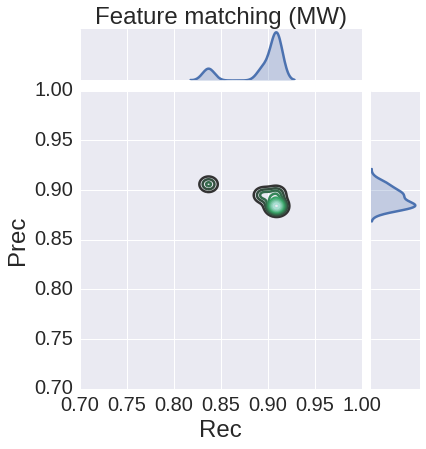

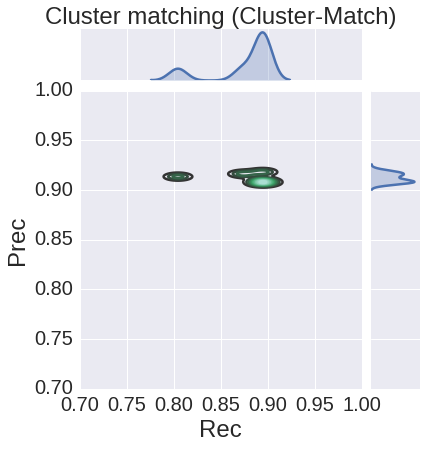

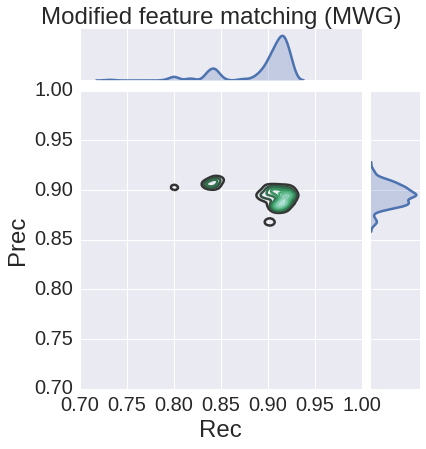

In [38]:
plot_density(exp_results_1a, 'Feature matching (MW)')
plot_density(exp_results_1b, 'Cluster matching (Cluster-Match)')
plot_density(exp_results_1c, 'Modified feature matching (MWG)')

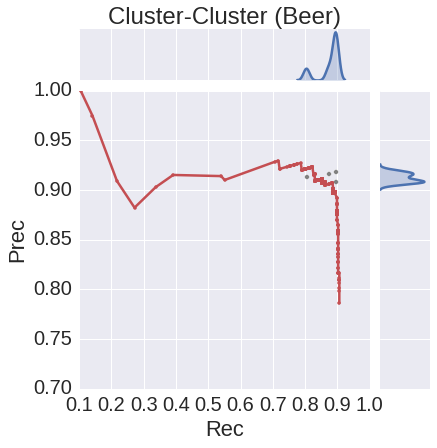

In [40]:
plot_scatter(exp_results_1b, 0, cluster_cluster, 'Cluster-Cluster (Beer)')

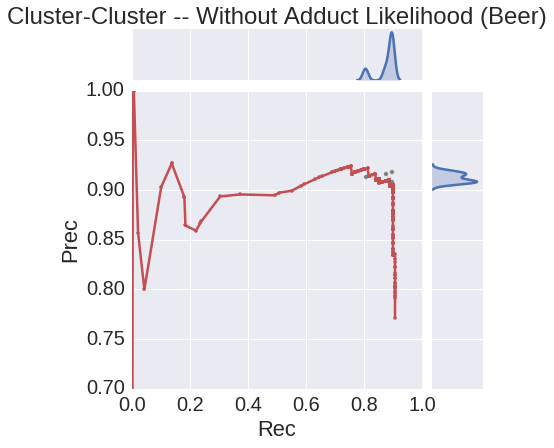

In [41]:
plot_scatter(exp_results_1b, 0, cluster_cluster_no_adduct, 'Cluster-Cluster -- Without Adduct Likelihood (Beer)')